In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import pandas as pd

In [14]:
path = '/Users/aaryansharma/Downloads/SMAI-Dataset-hc-dataset/new_customers.csv'

# Read the data

hc_df = pd.read_csv(path)

hc_df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [15]:
hc_df['Genre'] = hc_df['Genre'].replace({'Female': 0, 'Male': 1})
hc_df.head()

CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      1   19                  15                      39
1           2      1   21                  15                      81
2           3      0   20                  16                       6
3           4      0   23                  16                      77
4           5      0   31                  17                      40

In [16]:
hc_data = hc_df.to_numpy()
hc_data.shape

(200, 5)

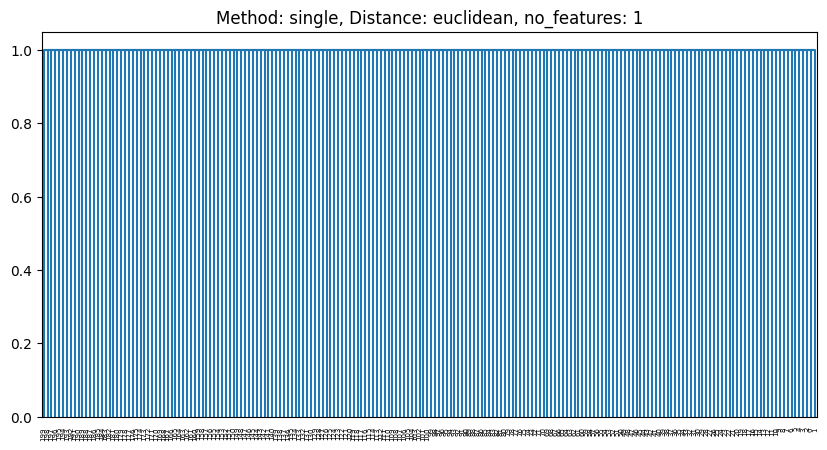

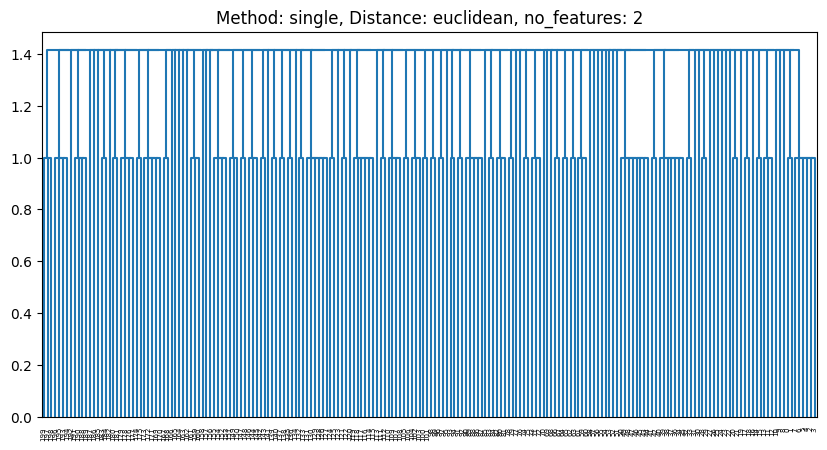

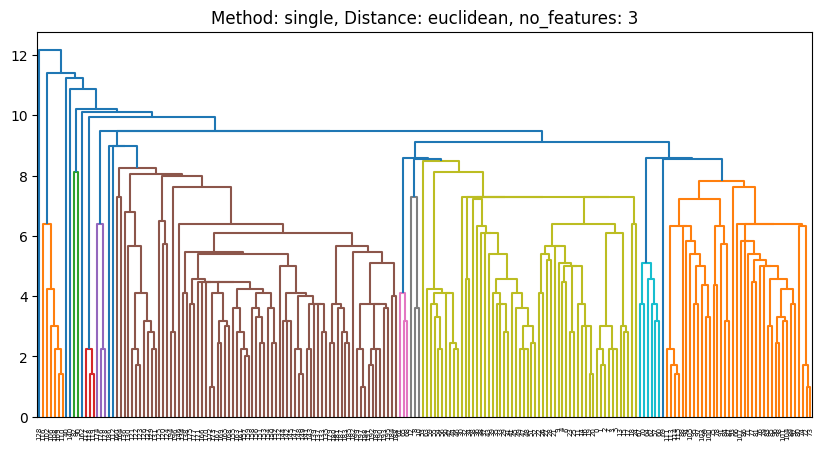

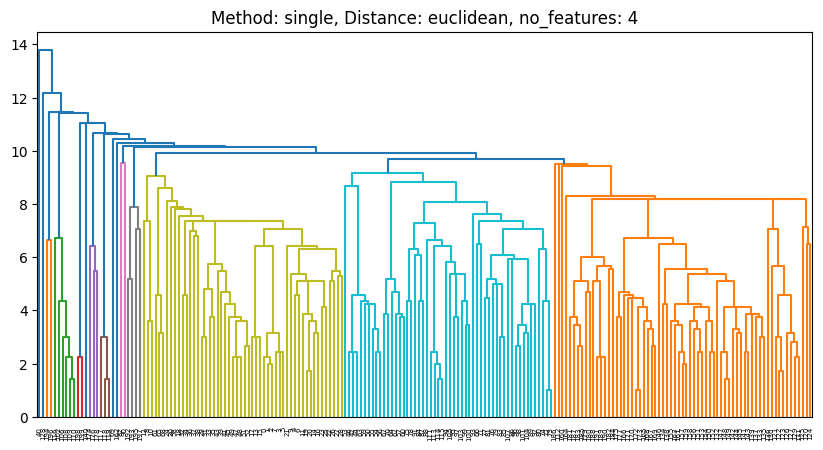

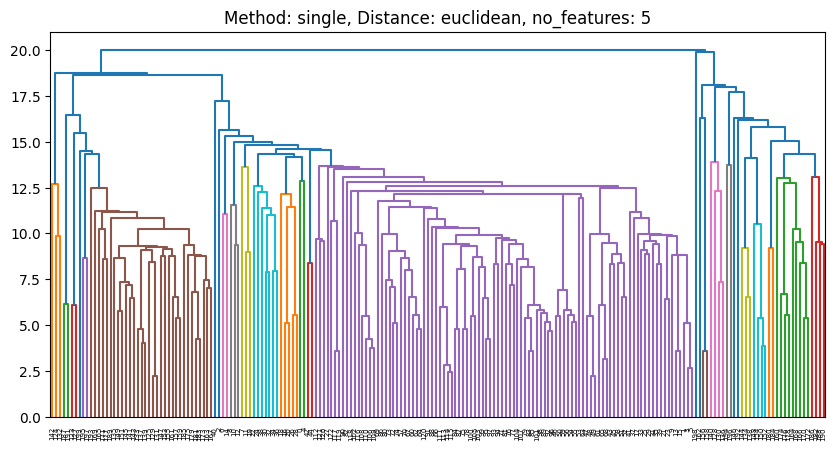

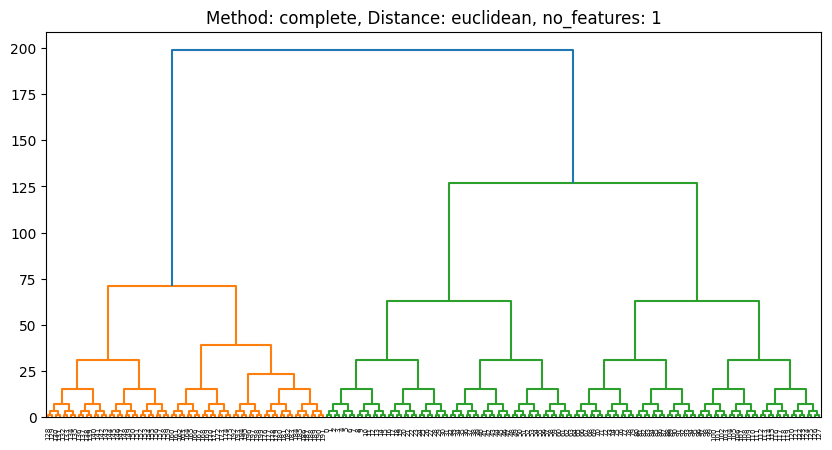

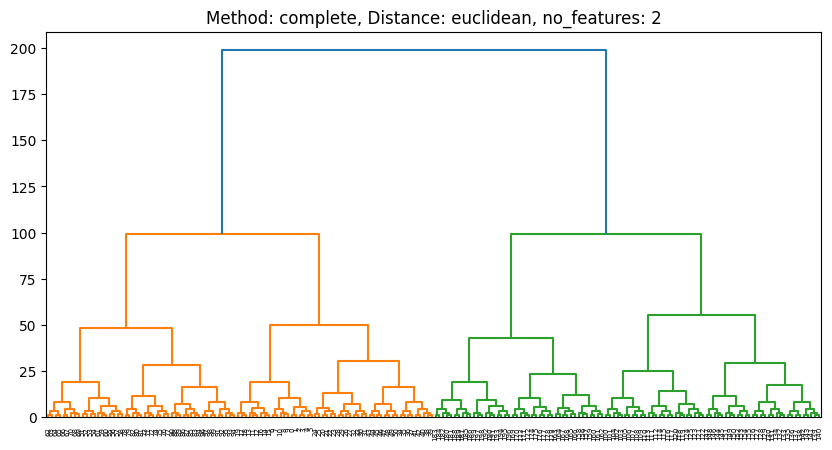

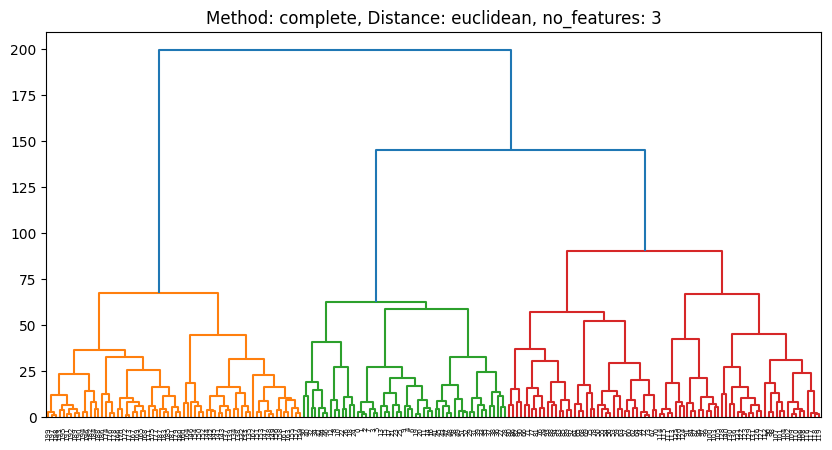

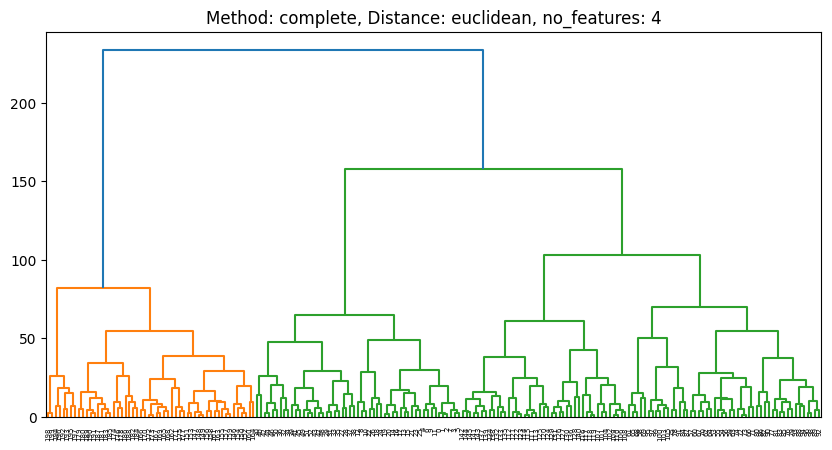

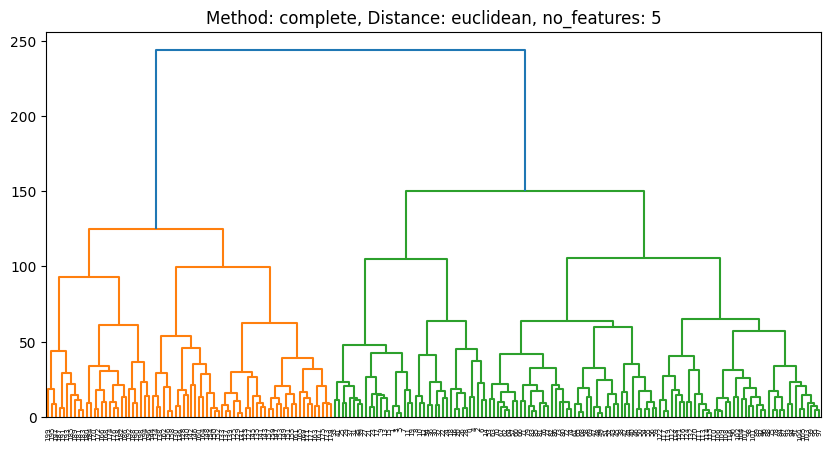

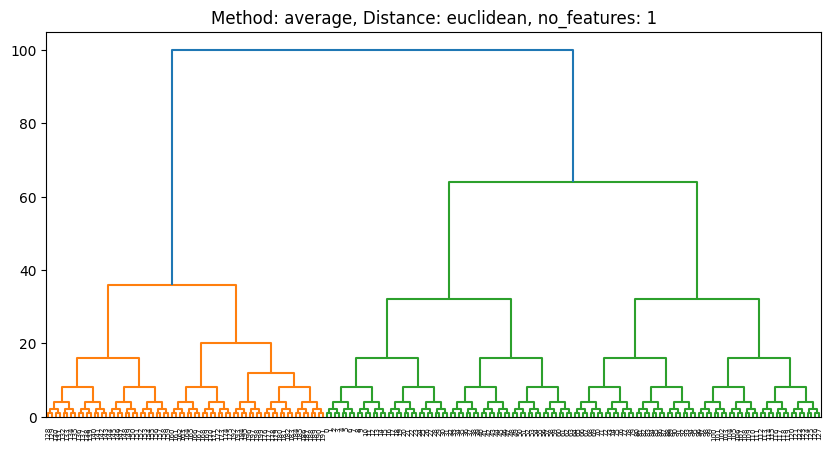

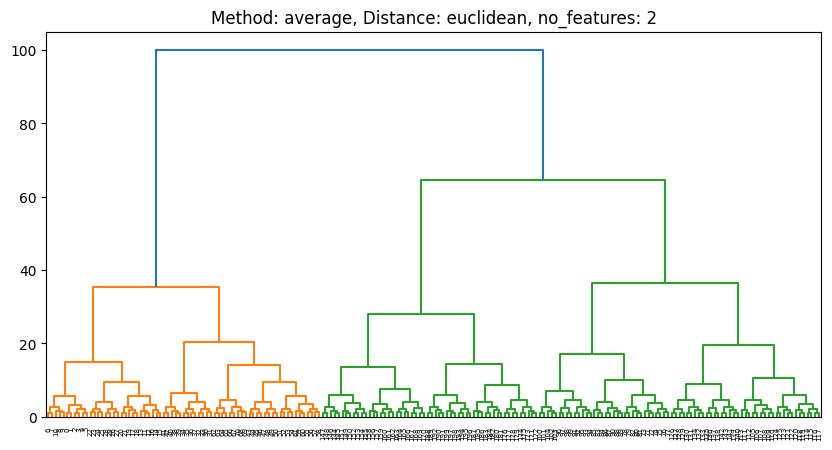

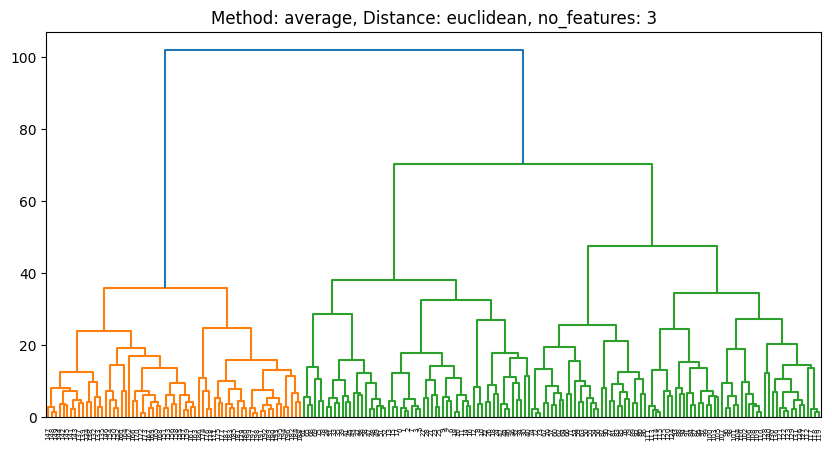

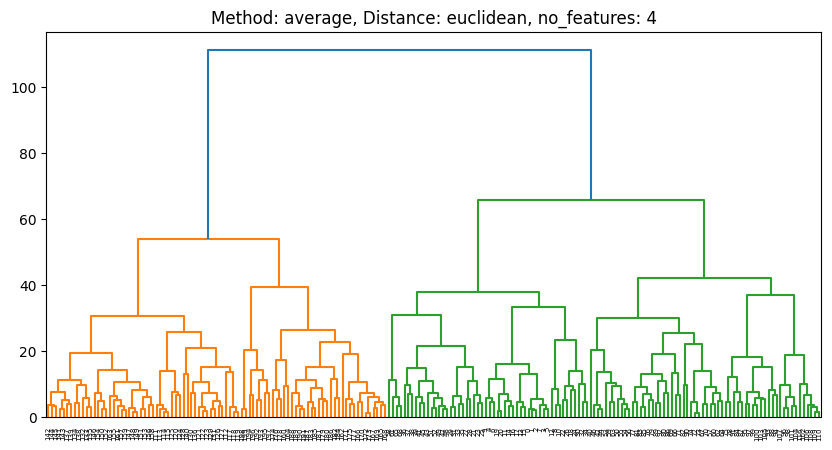

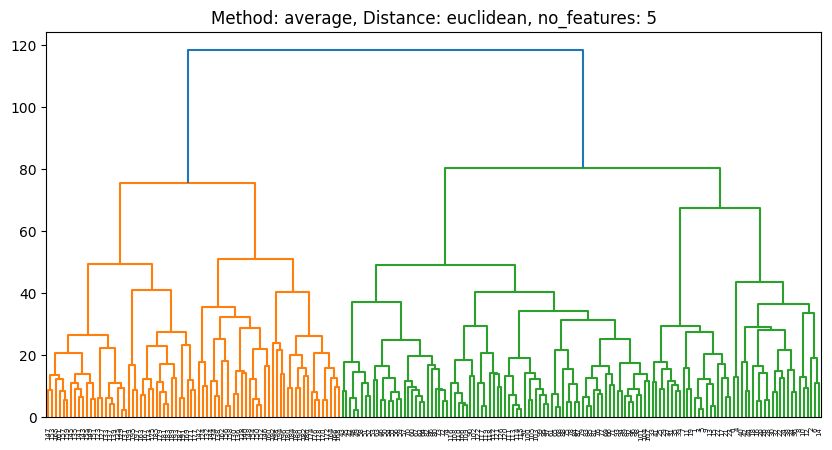

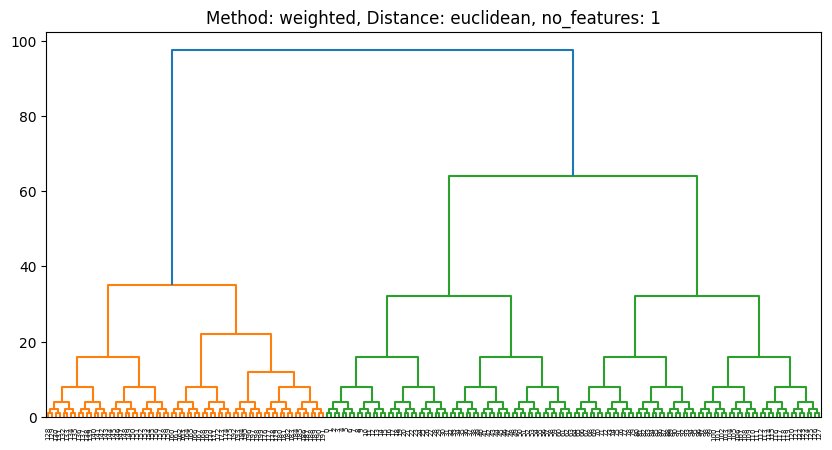

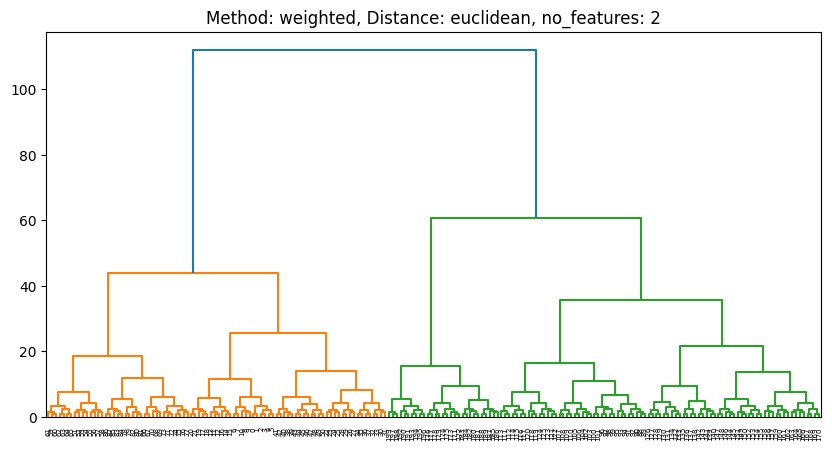

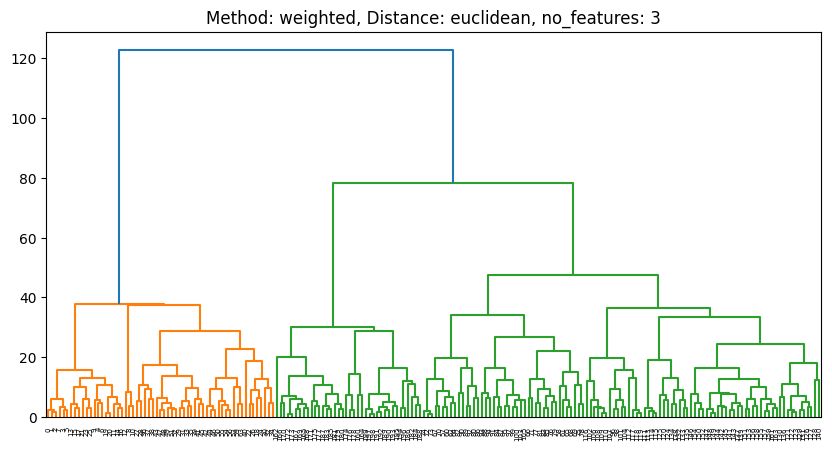

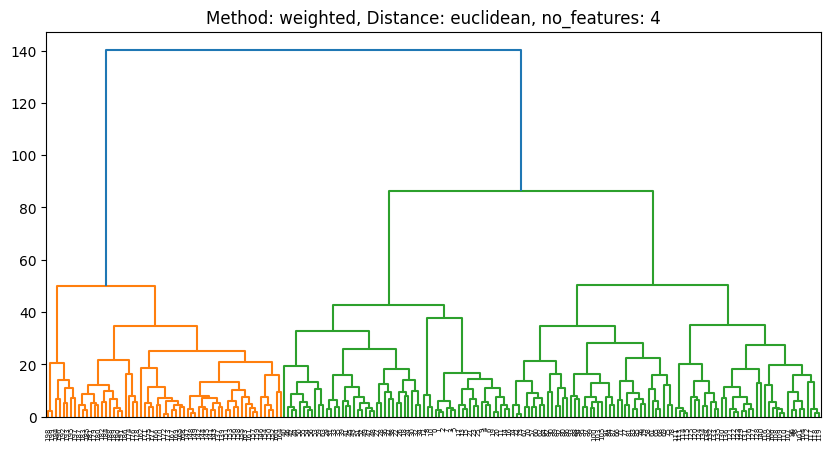

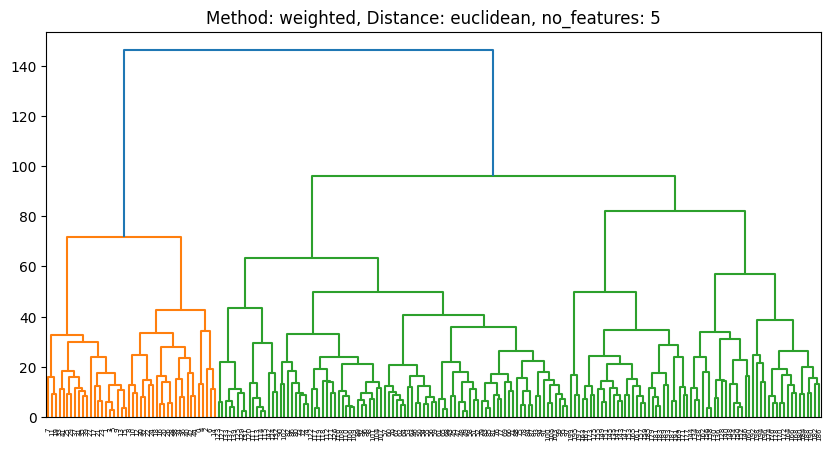

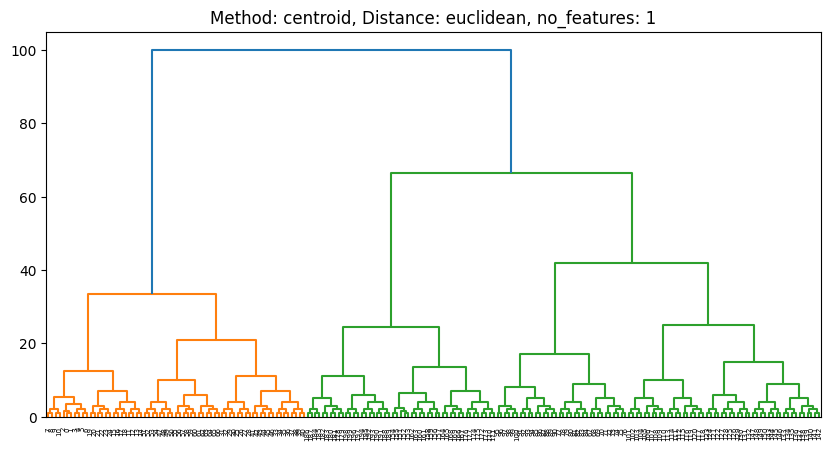

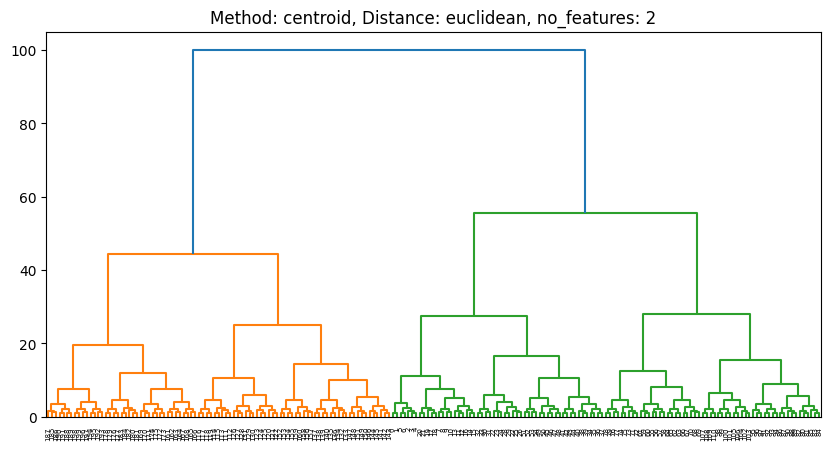

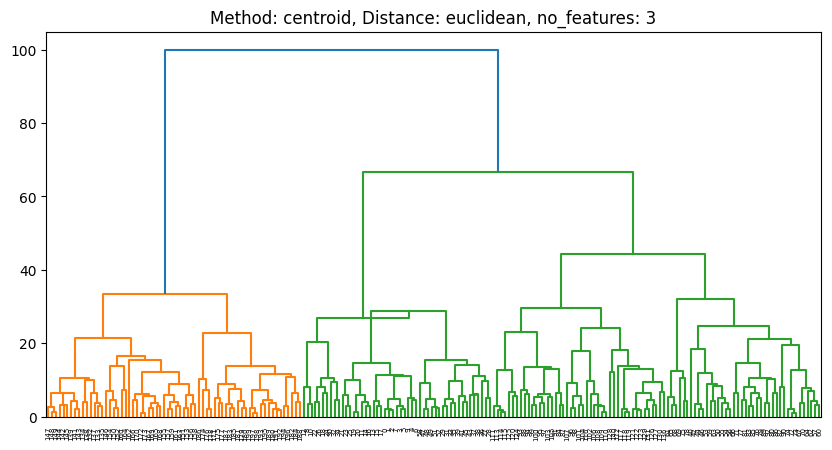

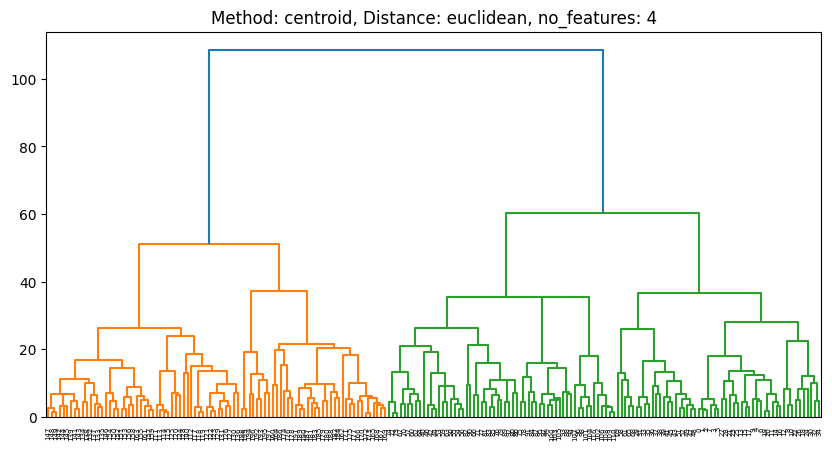

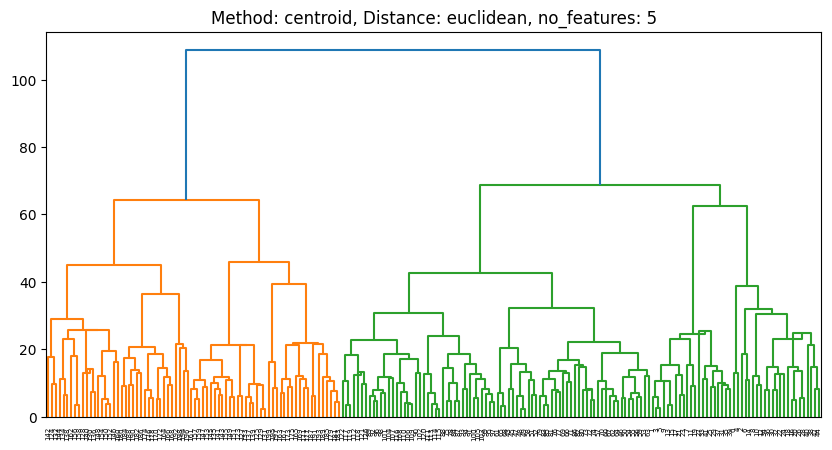

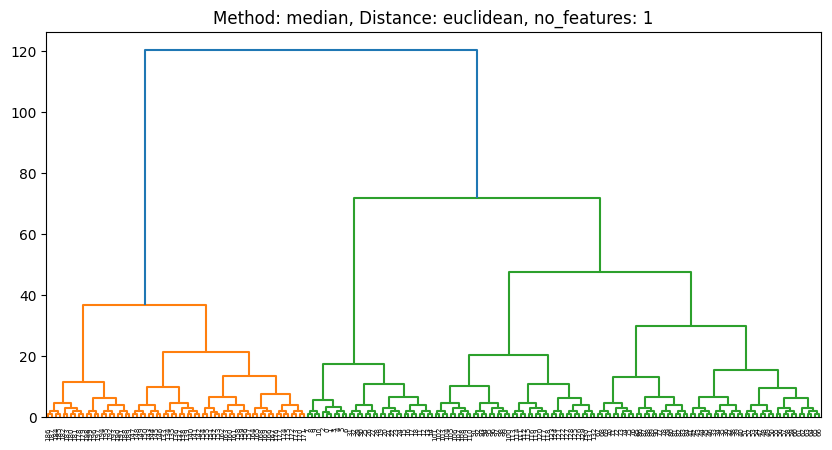

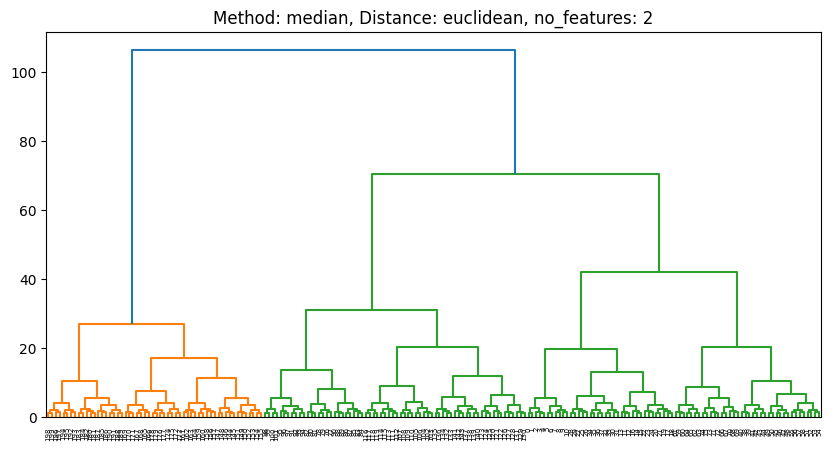

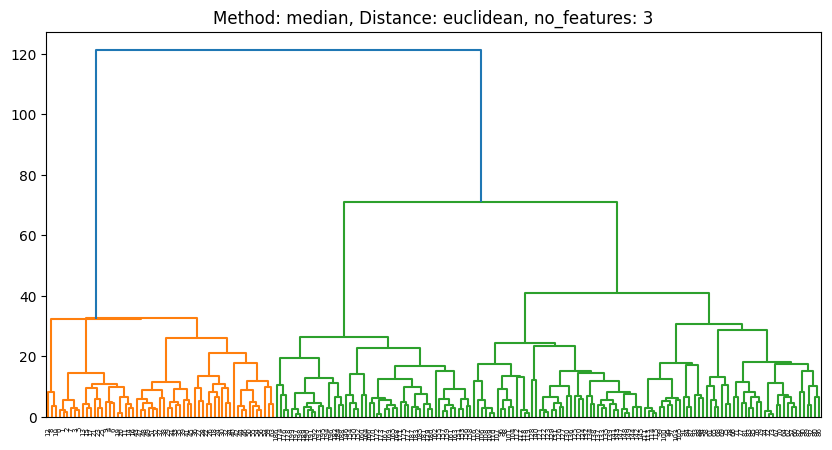

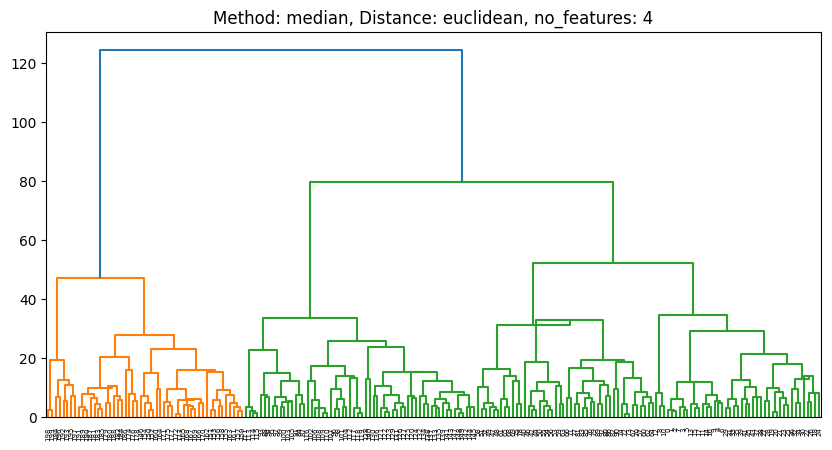

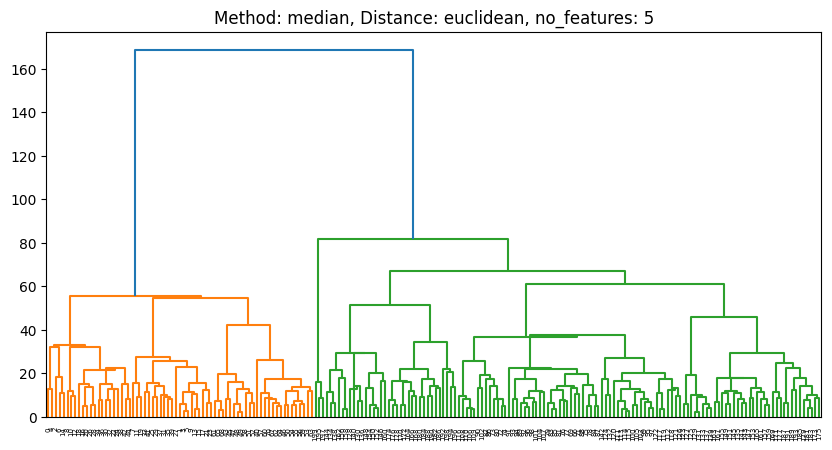

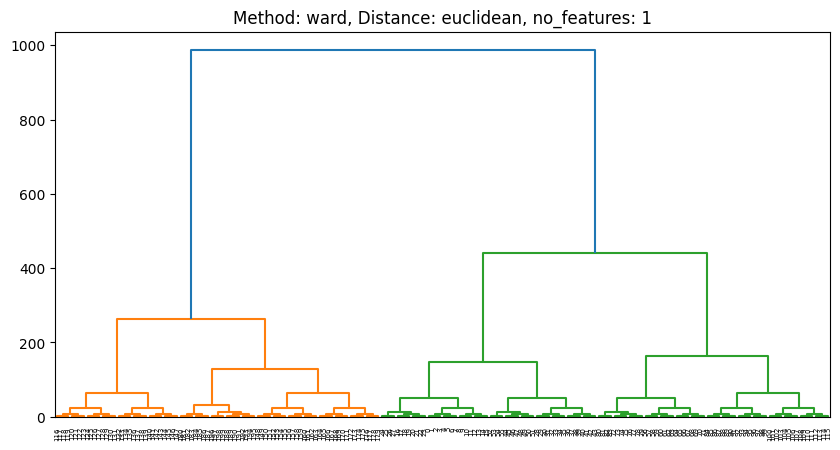

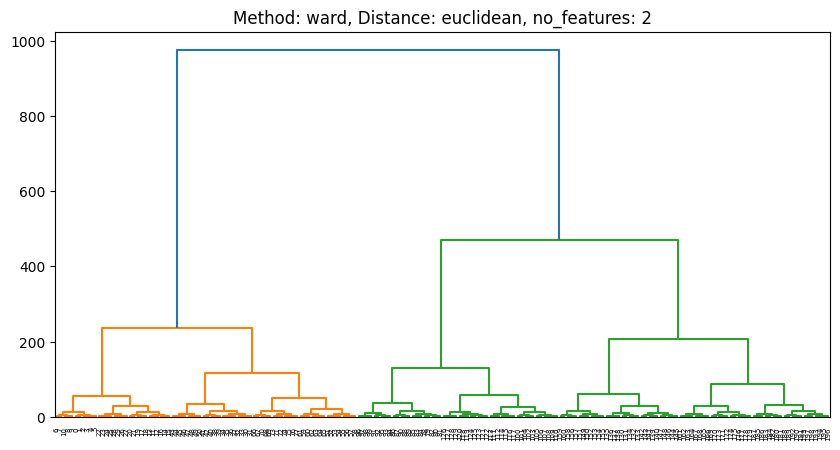

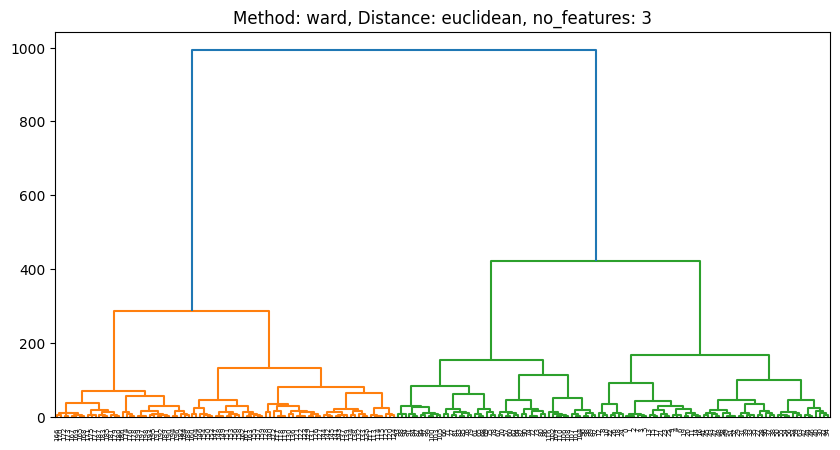

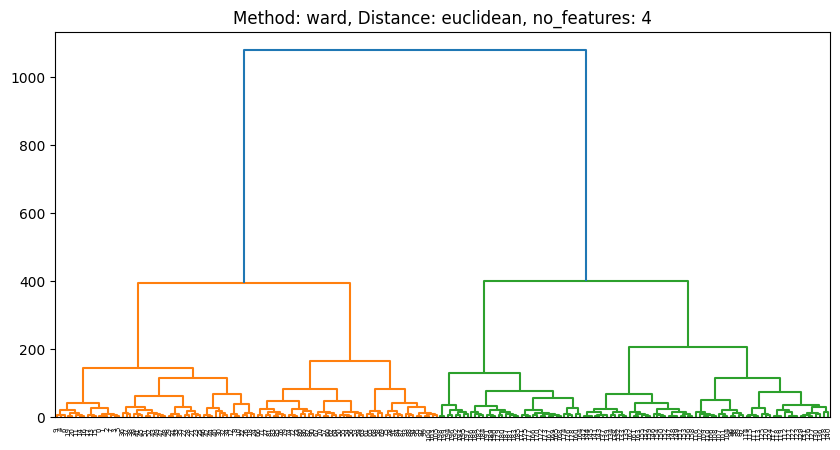

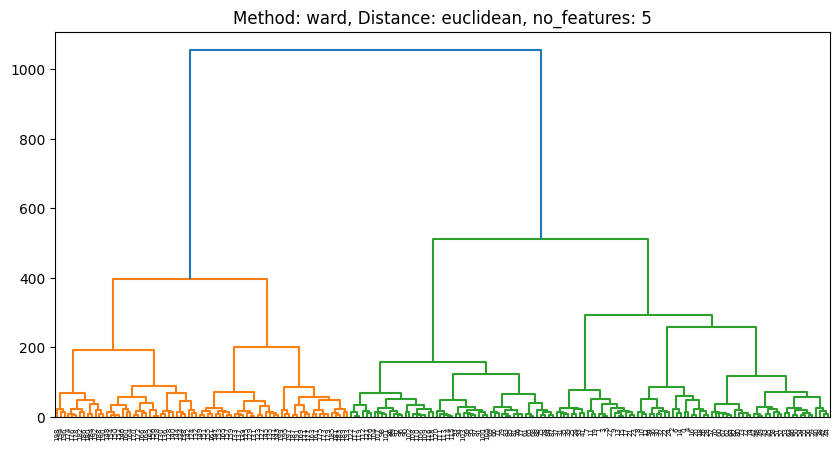

In [28]:
class HierarchicalClustering:
    def __init__(self, data):
        self.hc_data = data
    
    def linkages(self, linkage_type, distance_metric, features=None):
        if features is None:
            features = self.hc_data.shape[1]
        Z = linkage(self.hc_data[:, :features], method=linkage_type, metric=distance_metric)
        return Z
    
    def dendogram(self, Z, method, distance, features):
        plt.figure(figsize=(10, 5))
        plt.title(f'Method: {method}, Distance: {distance}, no_features: {features}')
        dendrogram(Z)
        plt.show()

hc = HierarchicalClustering(hc_data)

linkage_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']

for method in linkage_methods:
    for no_of_features in range(1, hc_data.shape[1]+1):
        Z = hc.linkages(method, 'euclidean', no_of_features)
        hc.dendogram(Z, method, 'euclidean', no_of_features)




From the dendrograms generated by the code, we can observe that the single linkage method produces a dendrogram with very long branches, indicating that the clusters are not well separated. The complete linkage method produces a dendrogram with well-separated clusters. The average linkage method produces a dendrogram that is similar to the complete linkage method, but with slightly shorter branches. The centroid linkage method produces a dendrogram with well-separated clusters, similar to the complete linkage method. 

For the new_customer, *_the complete linkage method seems to produce the best results in terms of well-separated clusters._*

In [19]:
gene_df = pd.read_csv('/Users/aaryansharma/Downloads/SMAI-Dataset-gene-expression/gene.csv')
gene_df.head()

ID_REF   GSM613412  GSM613413   GSM613414   GSM613415   GSM613416  \
0  10338001  5192.23000  5974.6500  5393.02000  5158.65000  5244.96000   
1  10338002   301.50300   307.6770   362.59600   372.77600   299.98000   
2  10338003  1850.11000  2037.5400  1891.18000  1752.97000  1718.80000   
3  10338004   927.98300  1140.8200   936.43300   918.44000   930.31300   
4  10338005     5.24974     5.0173     5.09585     3.76912     5.54982   

    GSM613417   GSM613418   GSM613419   GSM613420   GSM613421   GSM613422  \
0  5143.31000  4621.77000  5173.65000  5811.77000  5465.11000  4972.57000   
1   308.91200   311.88300   331.53300   344.16100   365.17200   357.14600   
2  1762.98000  1630.54000  1905.87000  2141.35000  1891.99000  1652.14000   
3   926.49600   793.72900   936.18400  1041.49000   942.37700   891.35900   
4     5.27357     3.79682     4.66623     5.68881     5.25432     4.66148   

    GSM613423  
0  4528.70000  
1   372.43600  
2  1593.69000  
3   826.81100  
4     3.93062

In [20]:
gene_data = gene_df.to_numpy()
gene_data.shape

(58, 13)

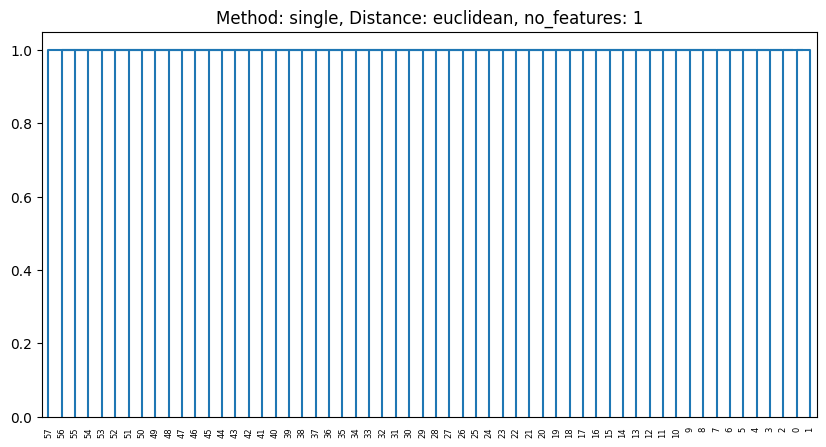

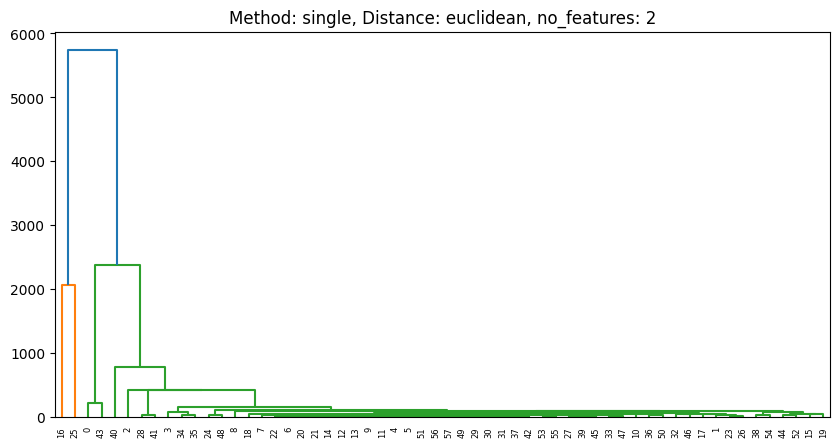

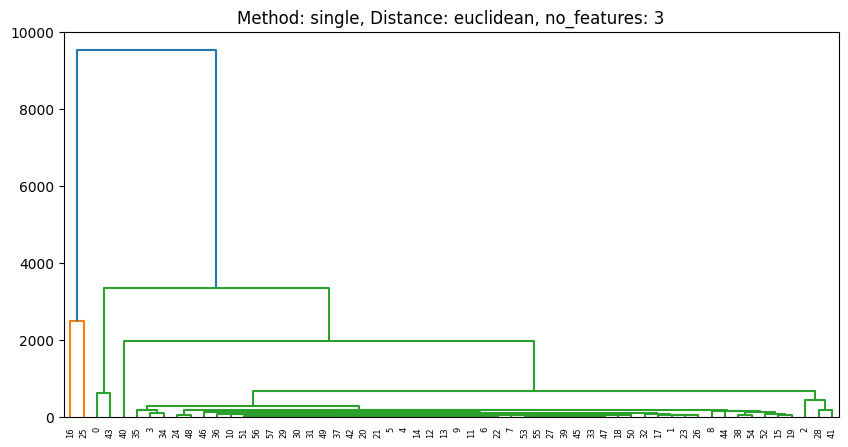

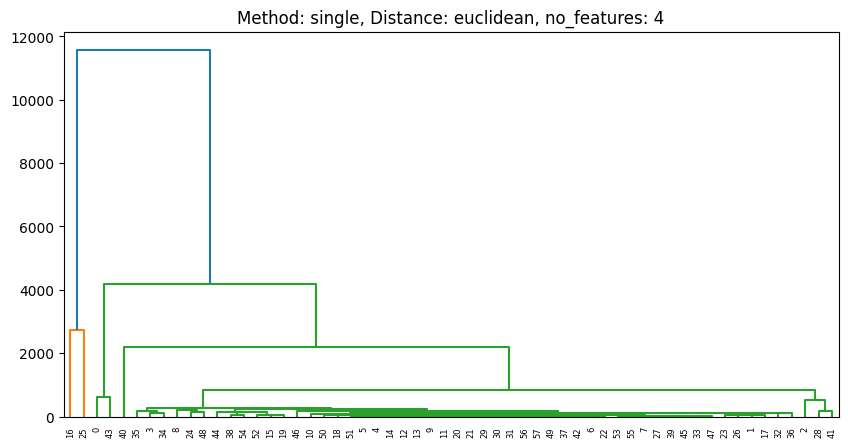

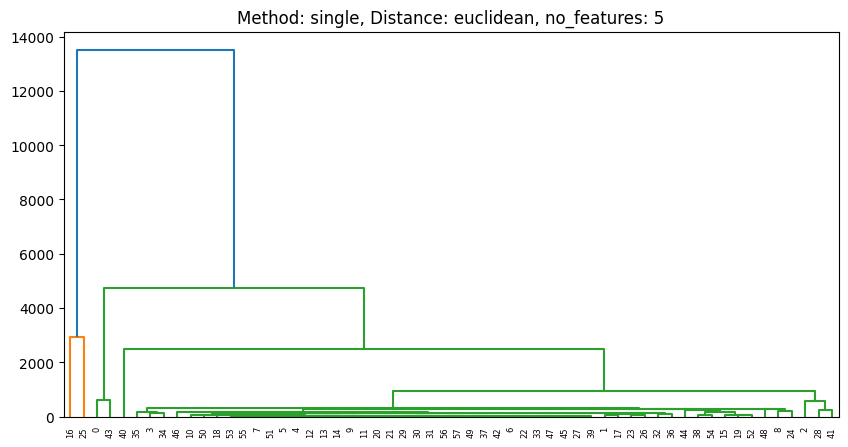

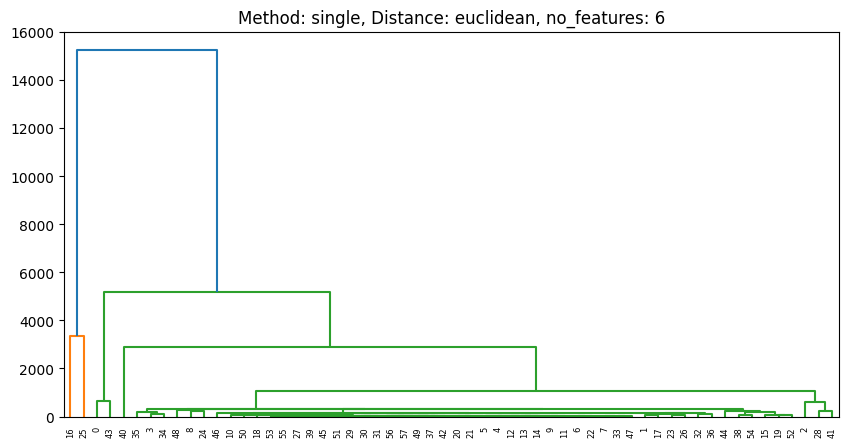

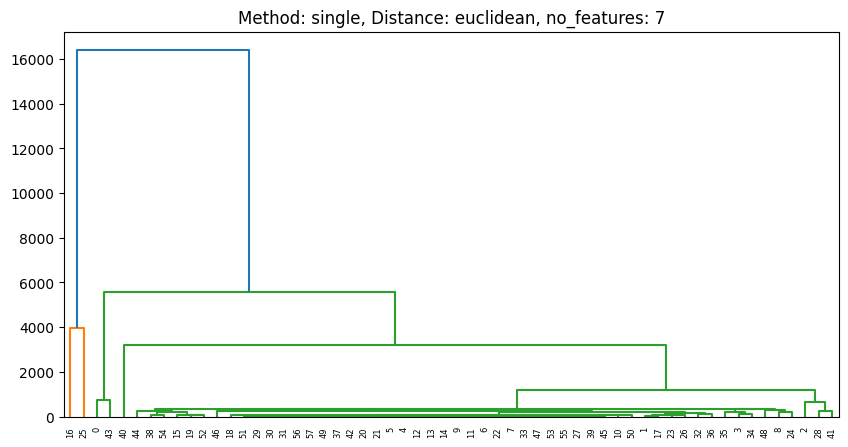

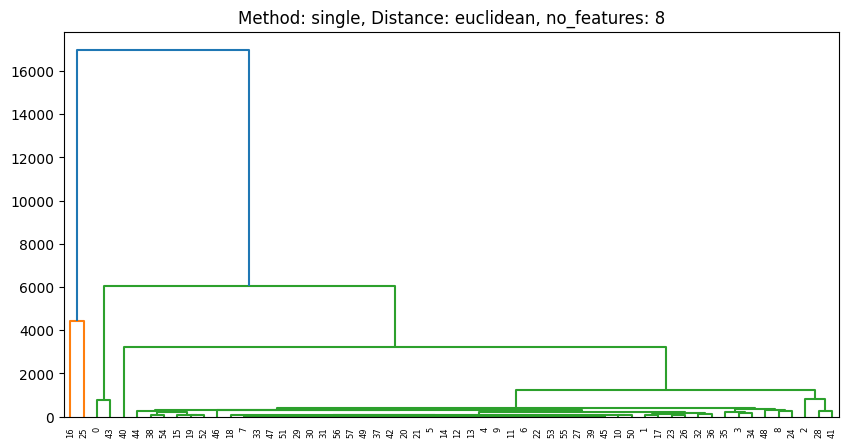

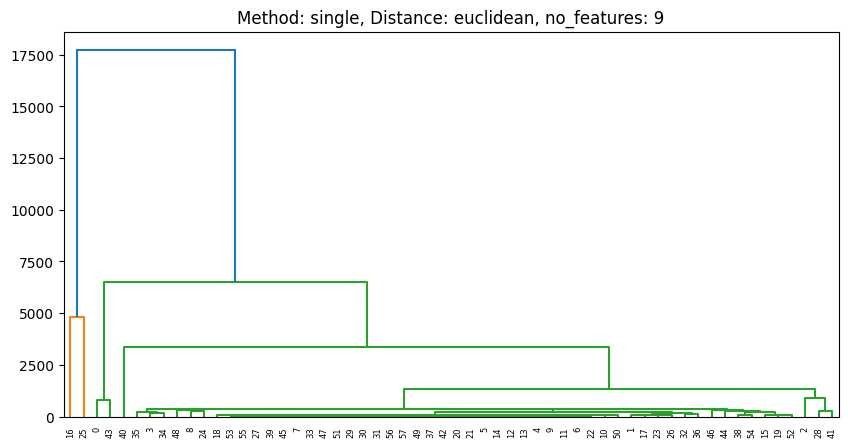

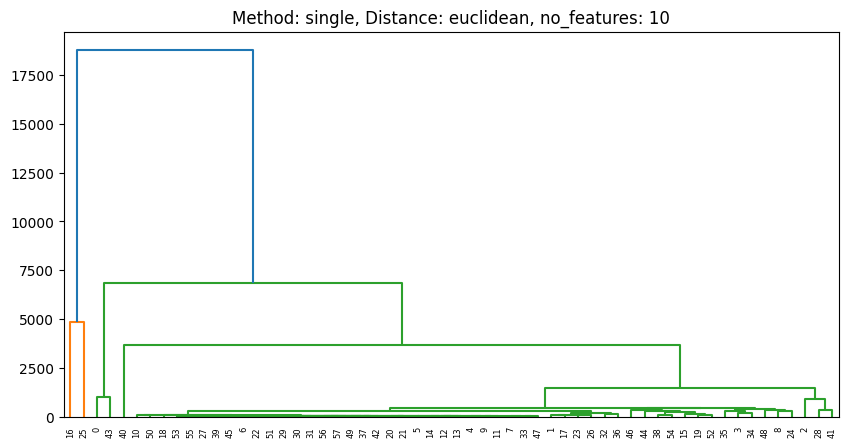

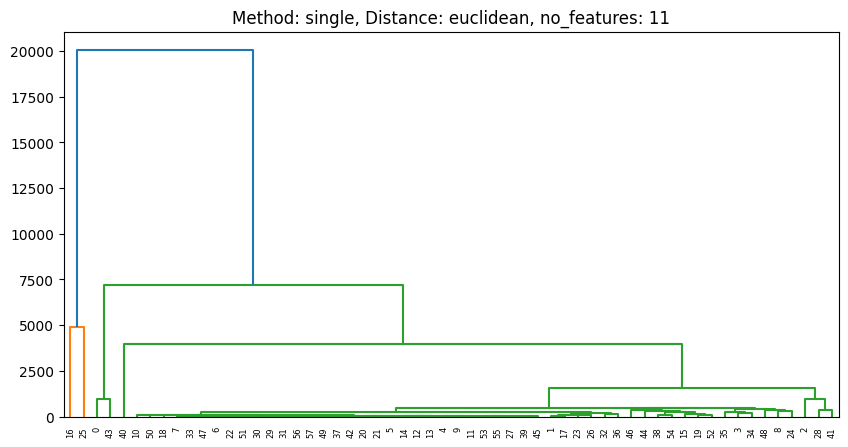

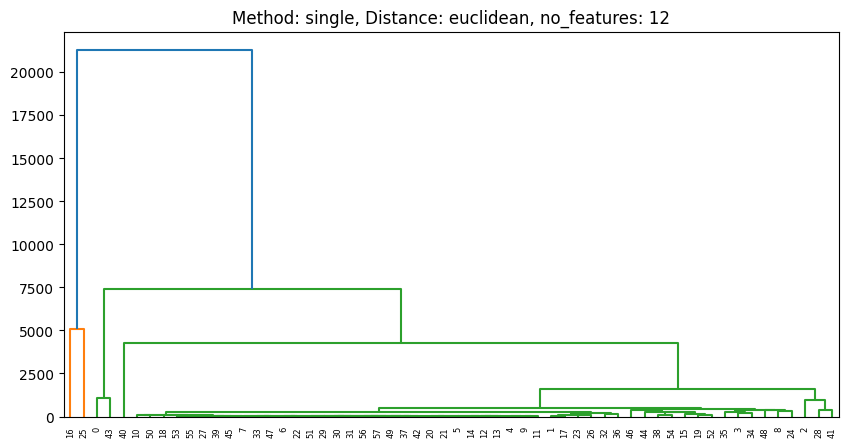

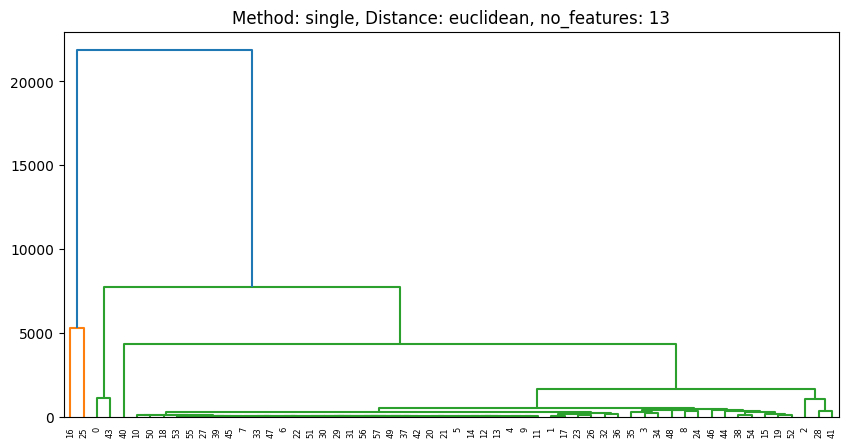

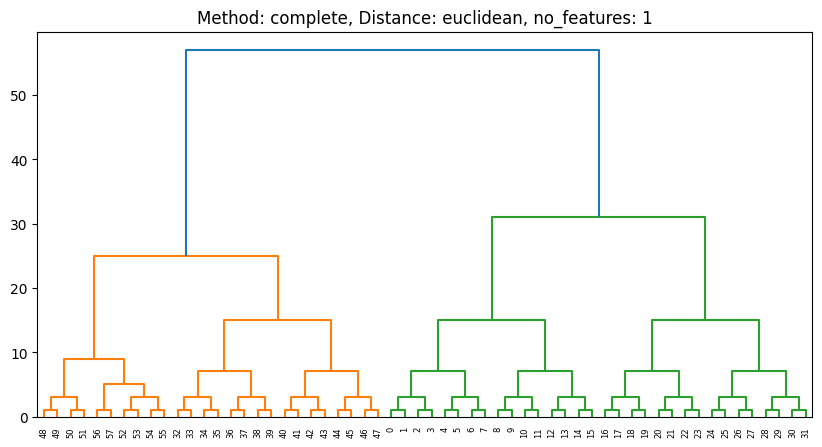

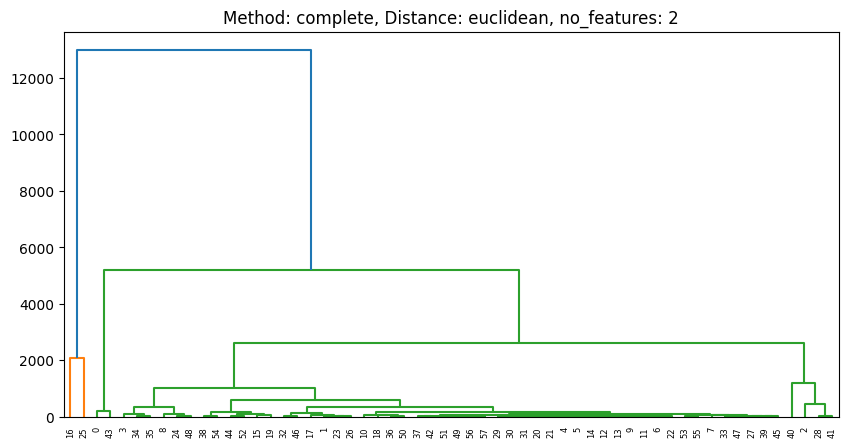

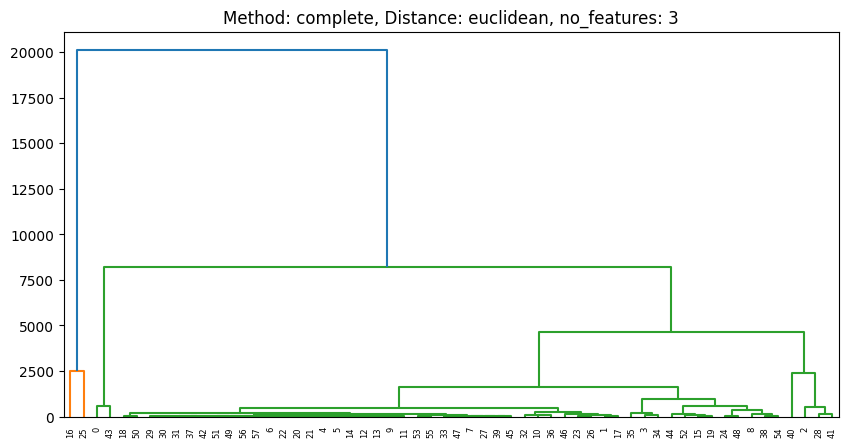

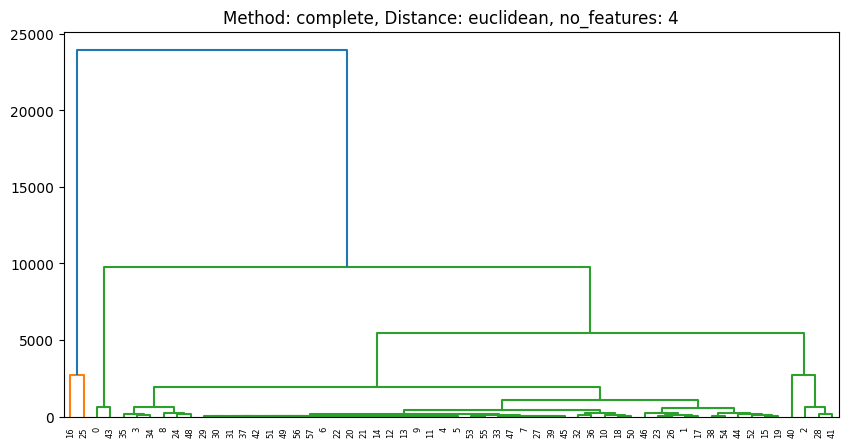

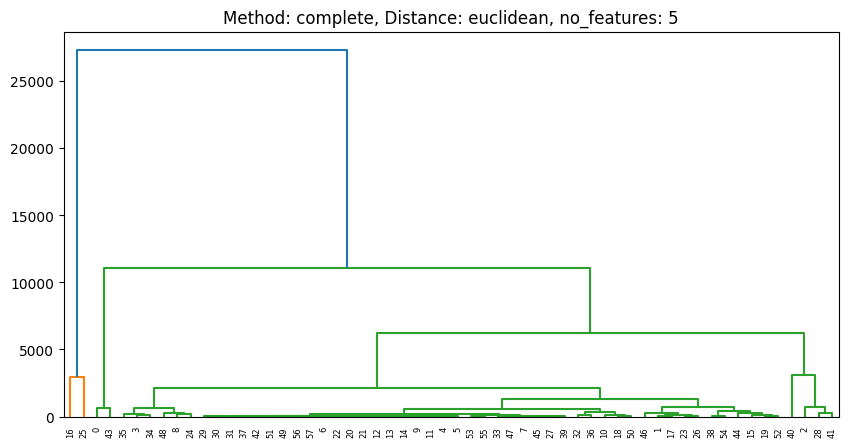

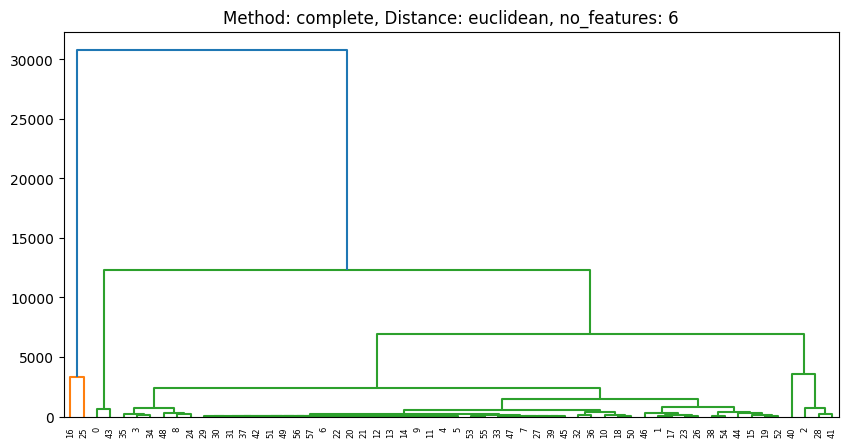

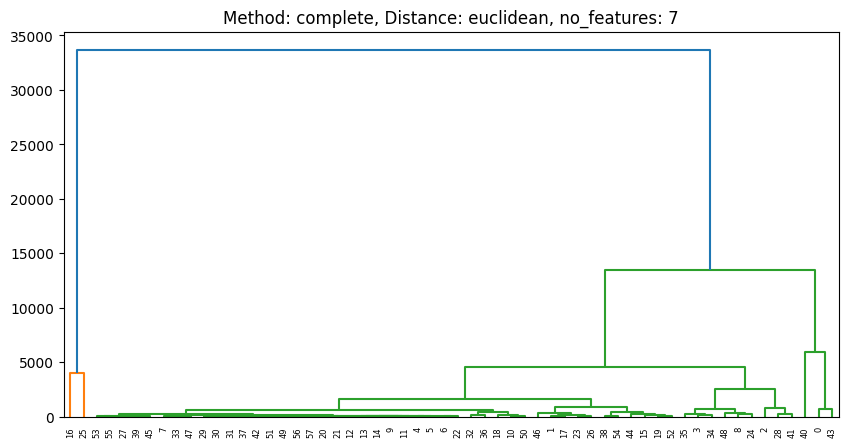

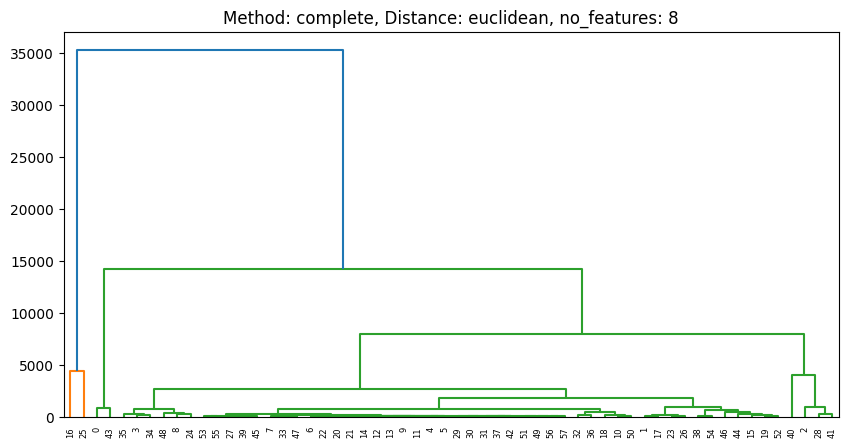

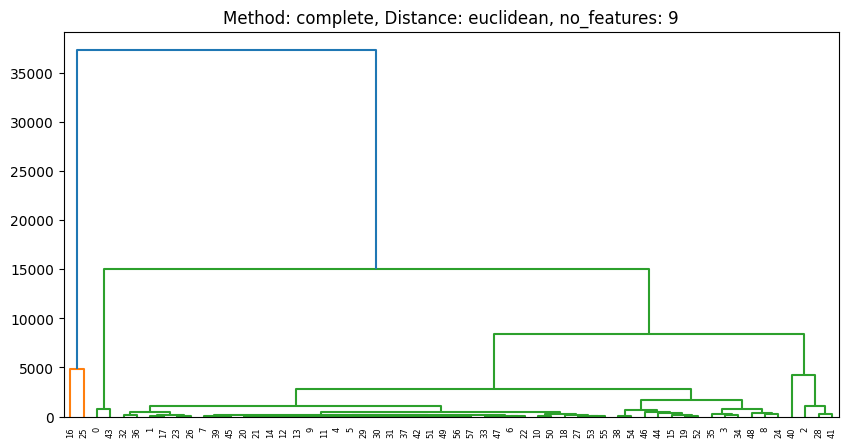

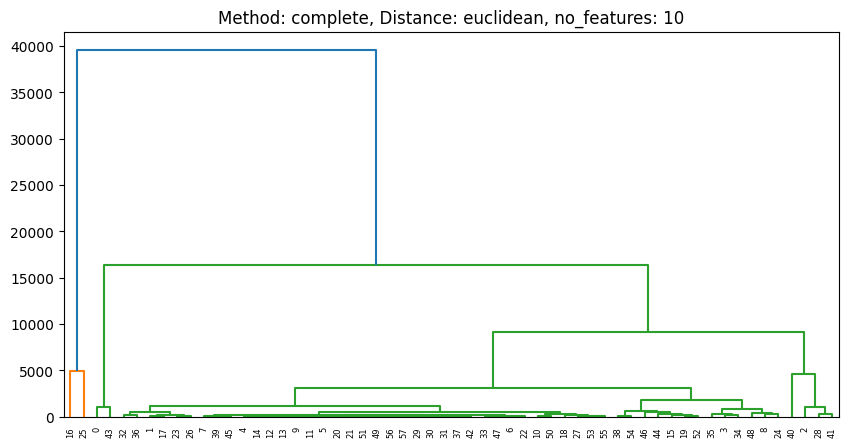

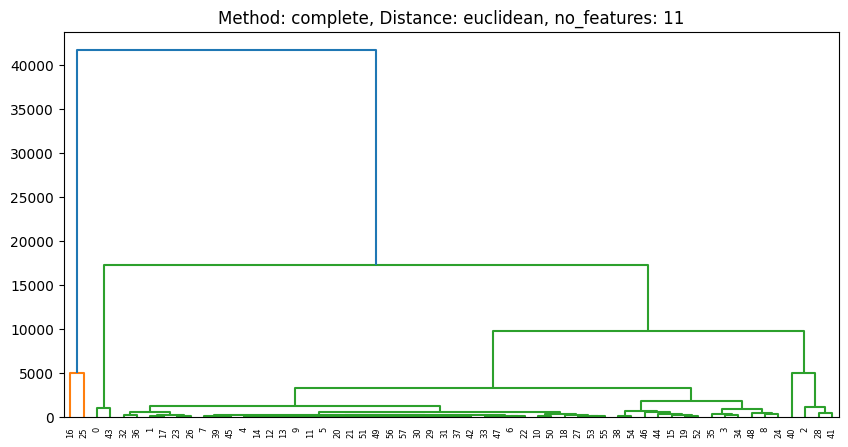

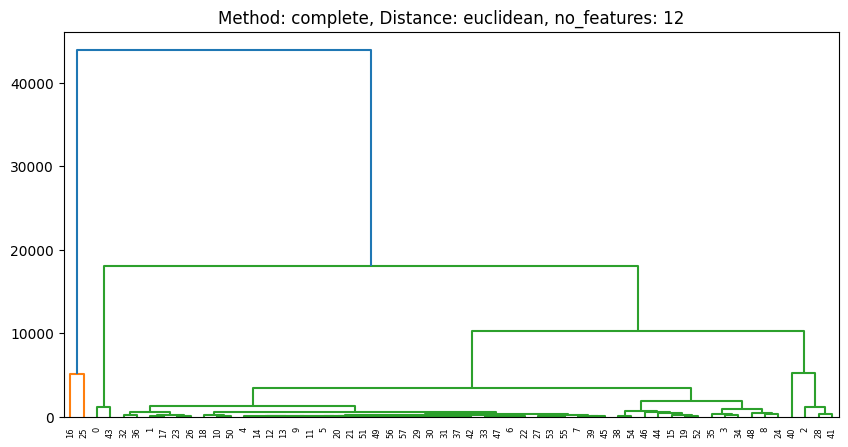

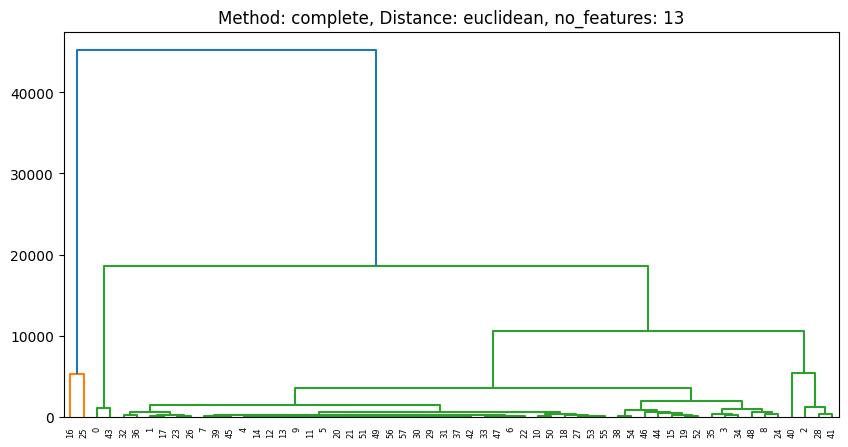

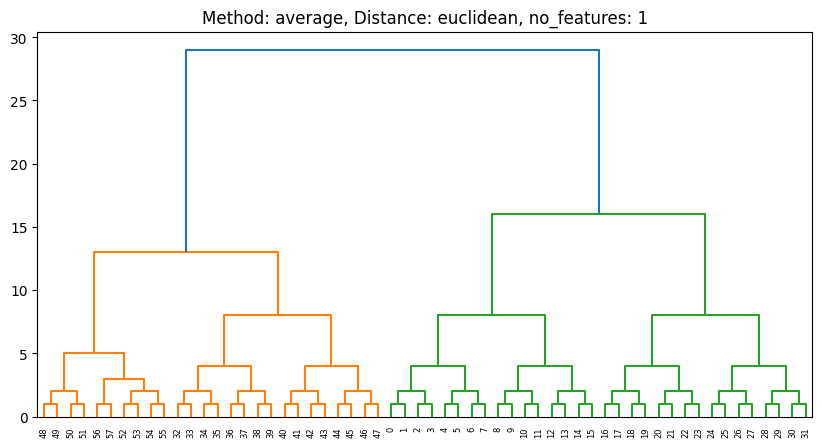

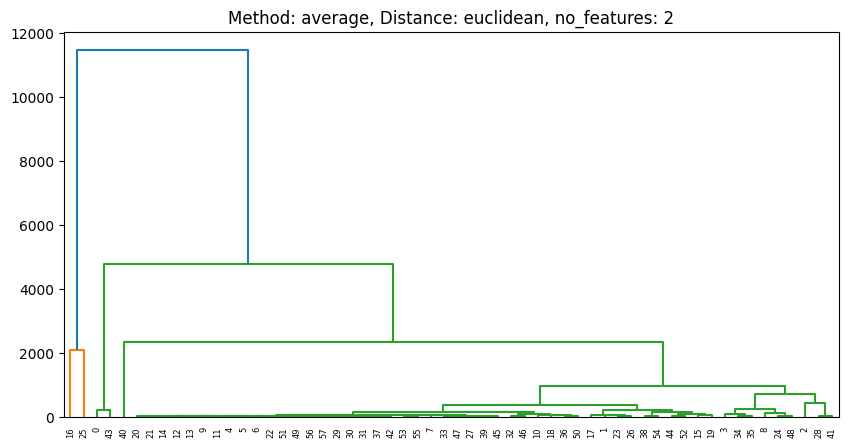

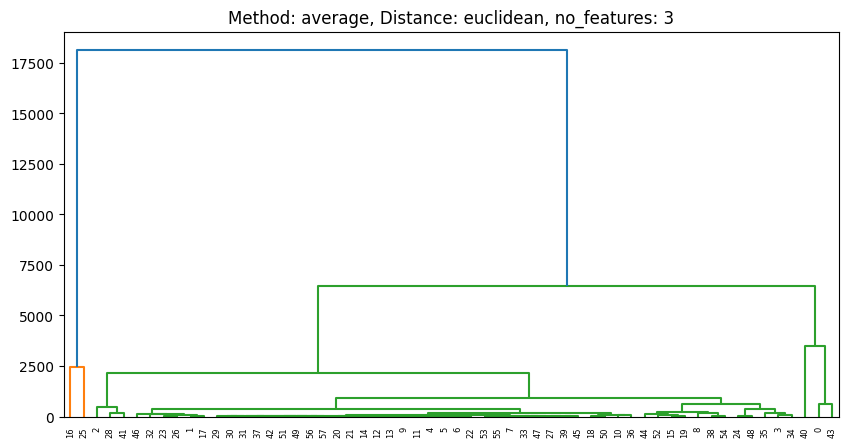

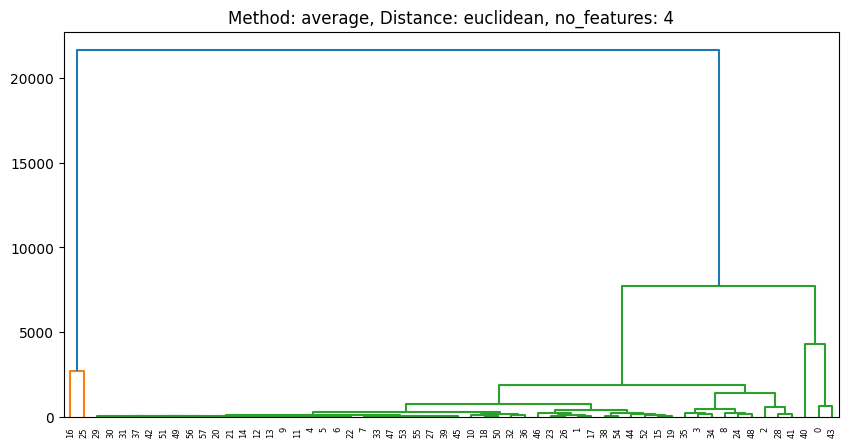

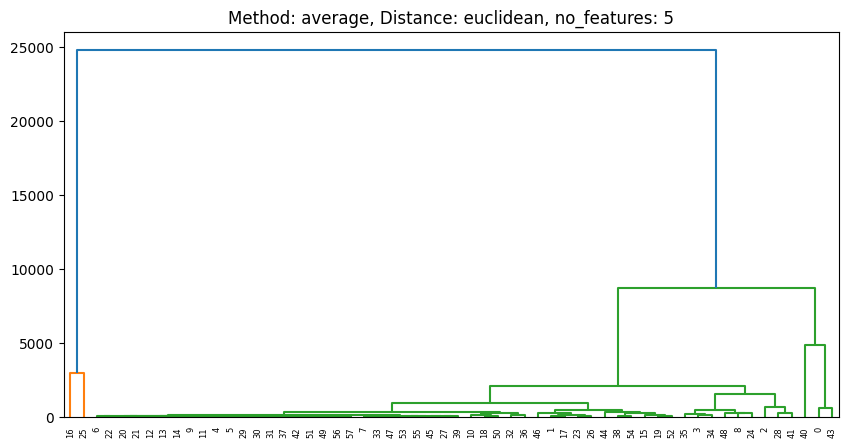

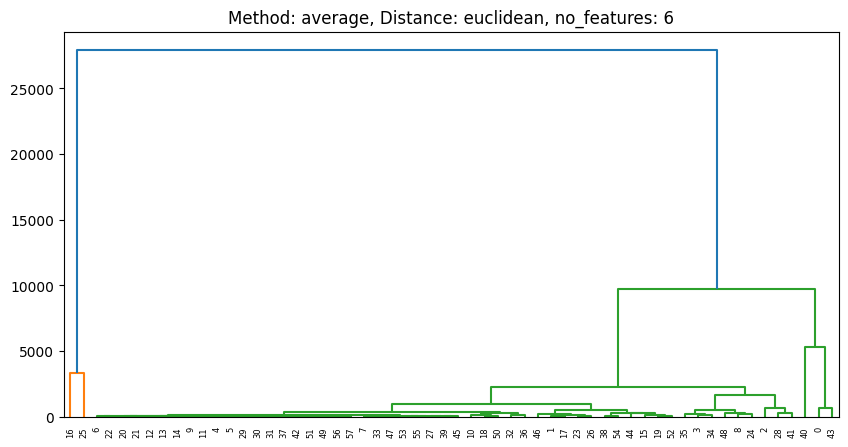

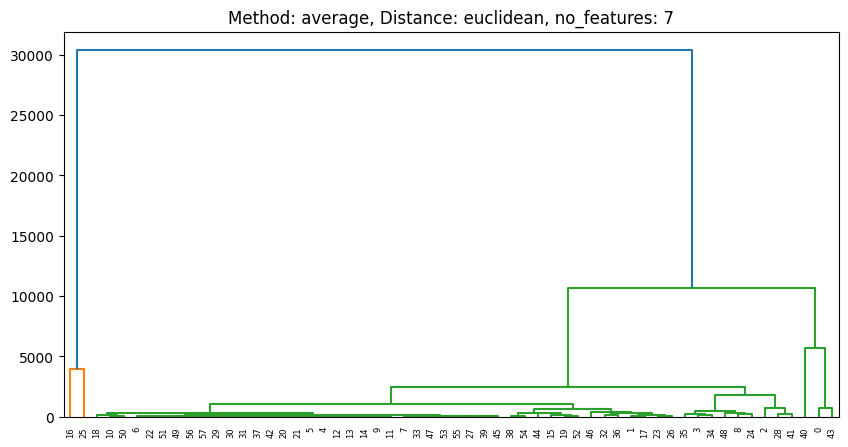

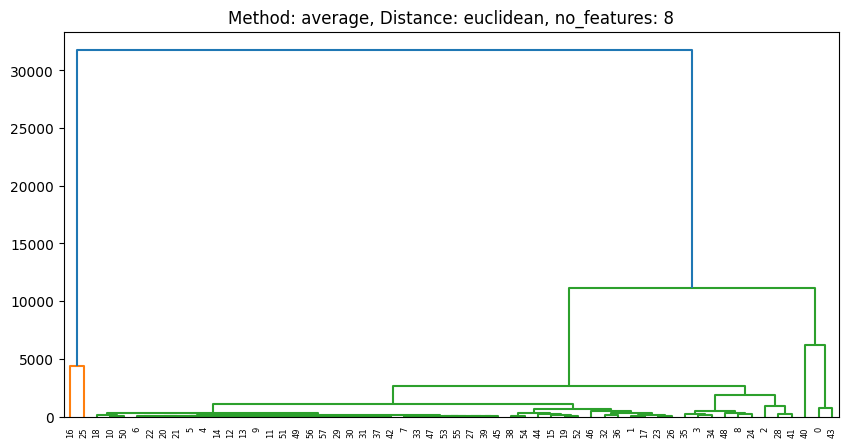

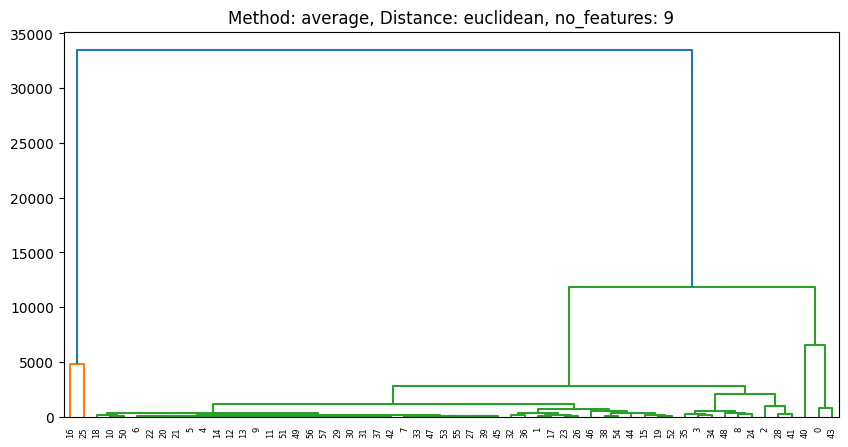

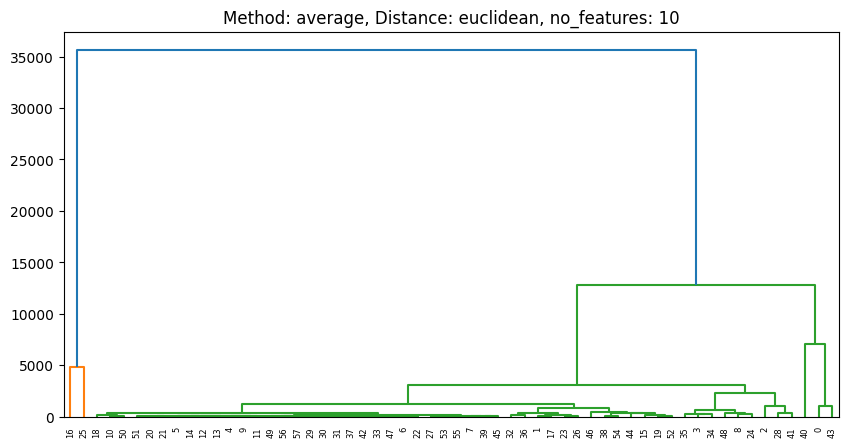

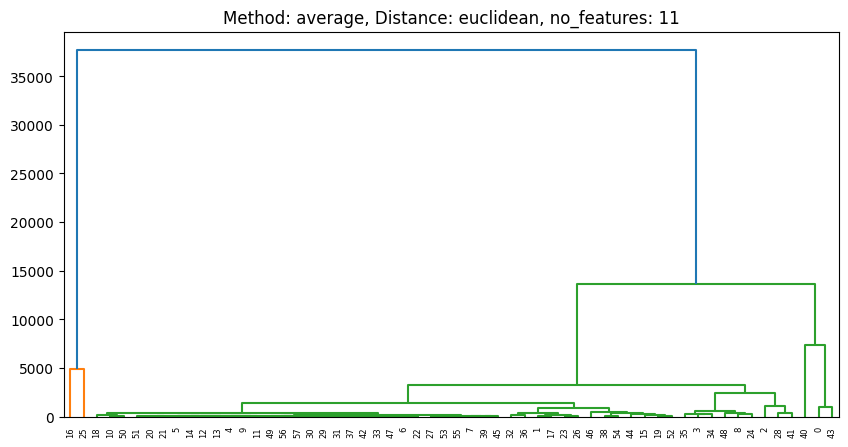

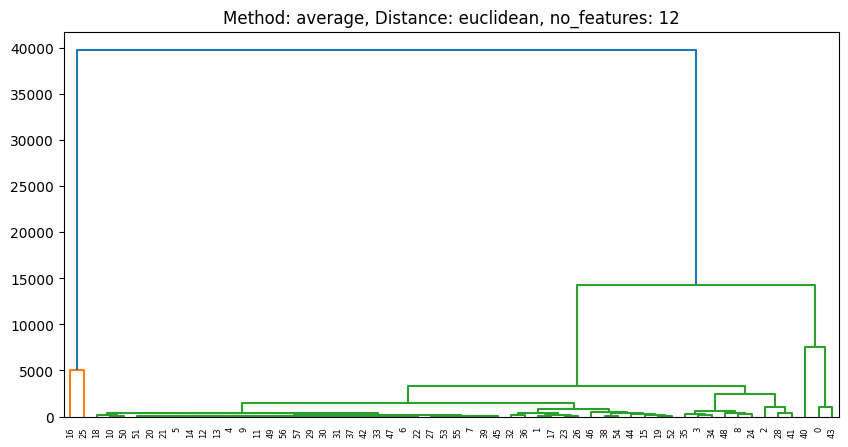

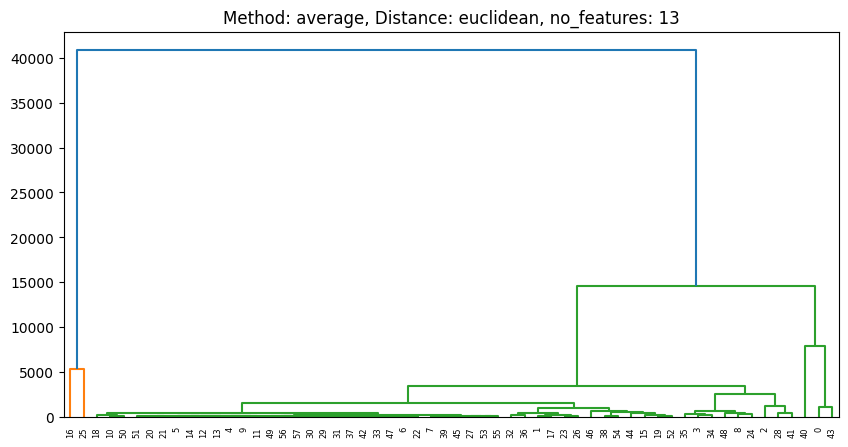

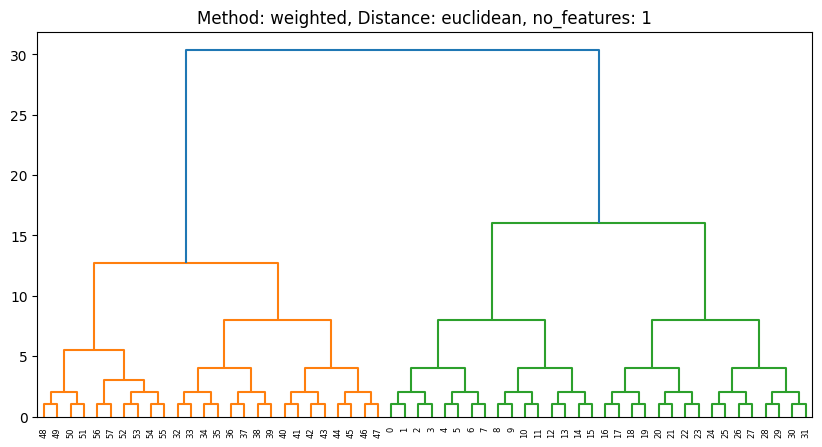

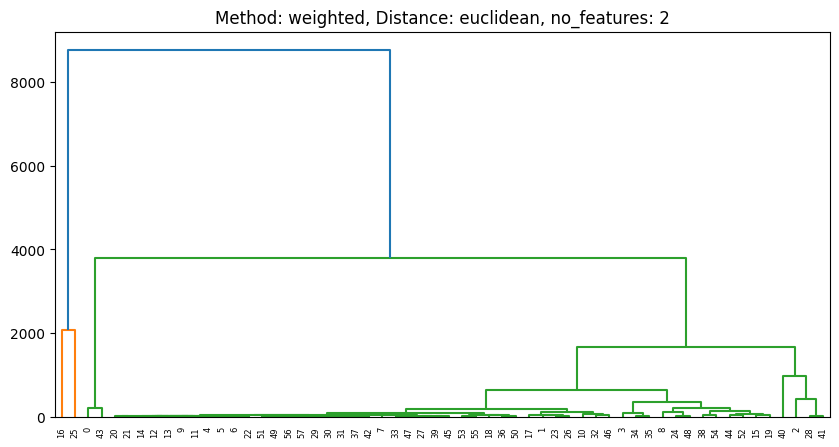

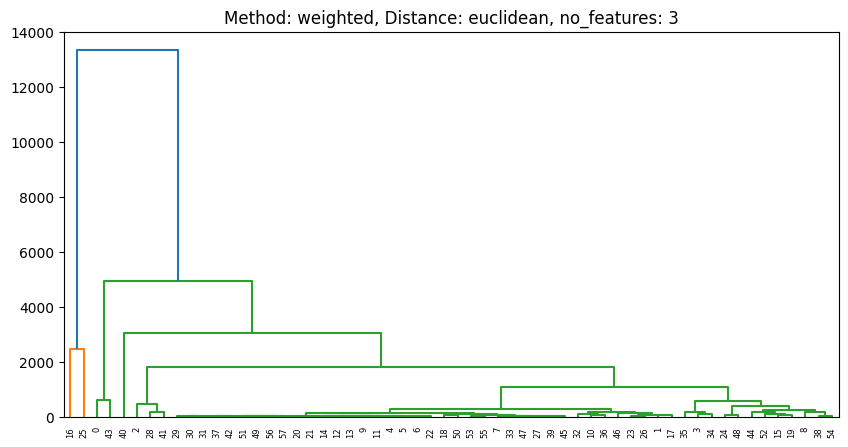

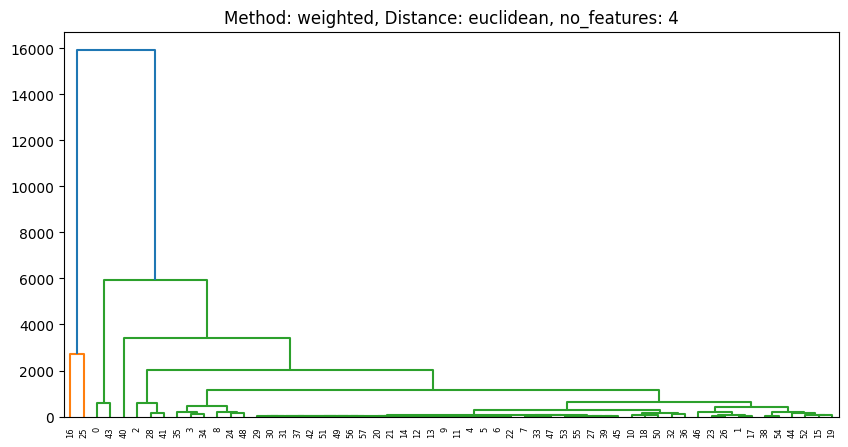

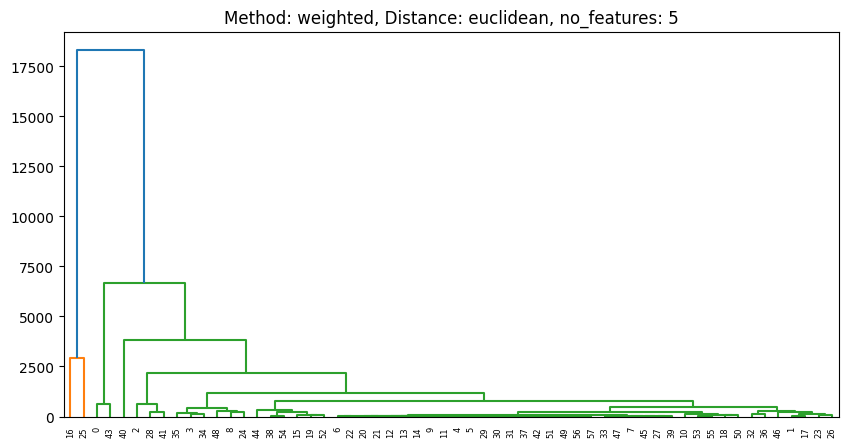

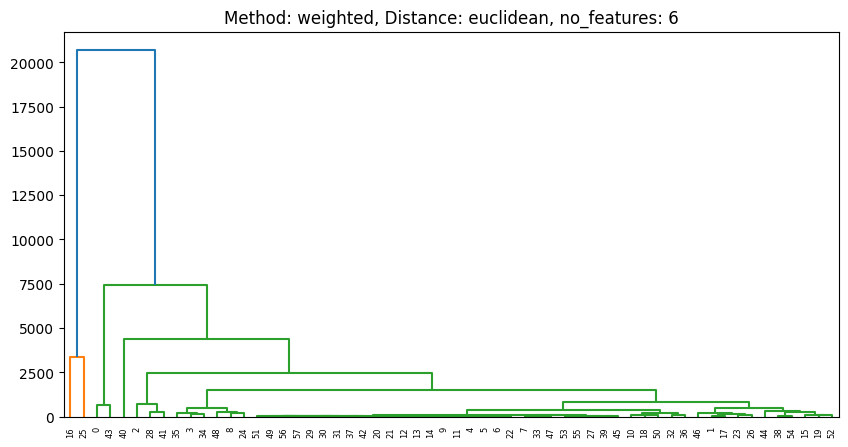

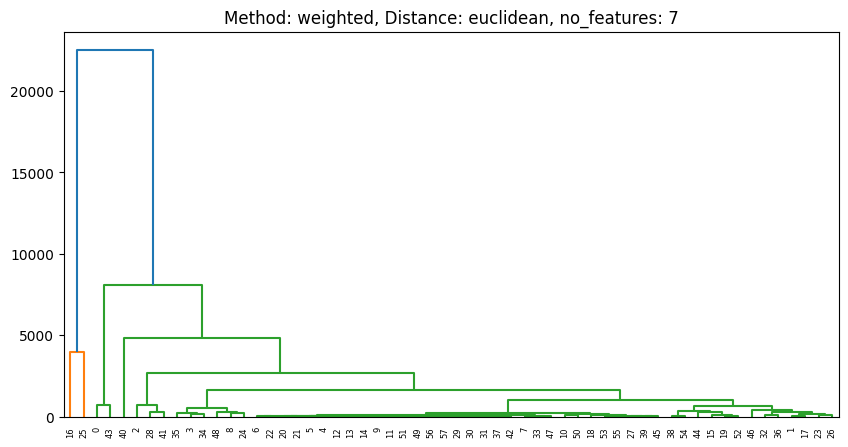

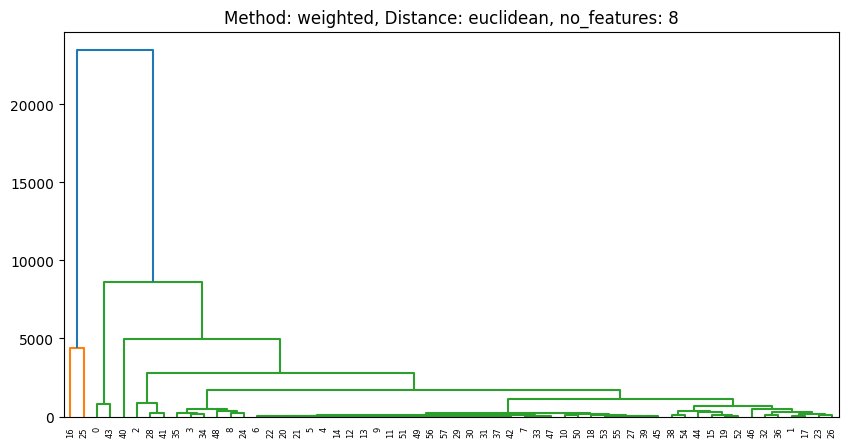

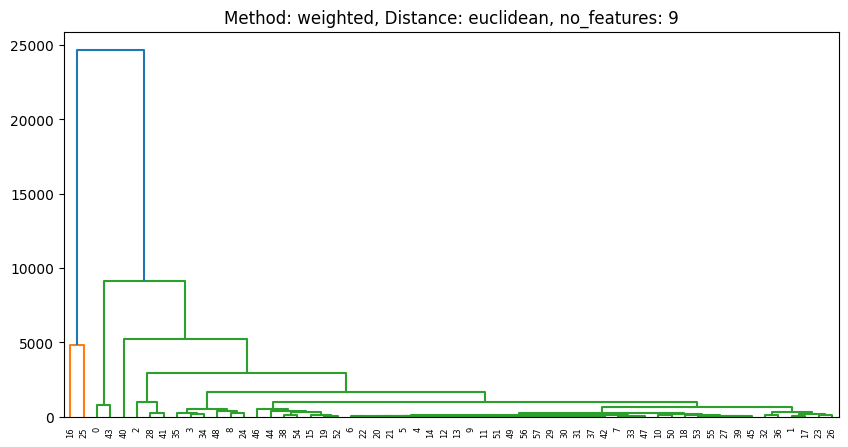

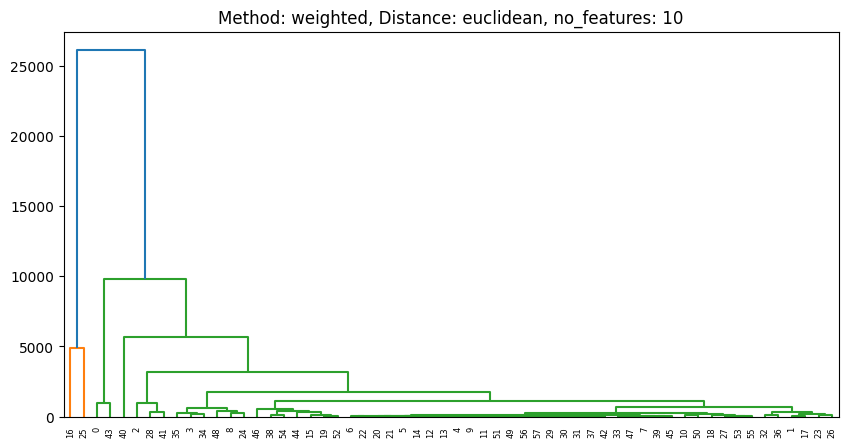

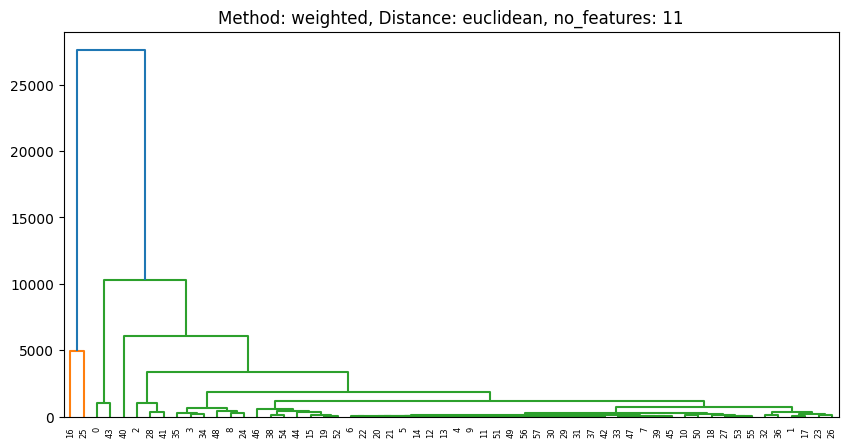

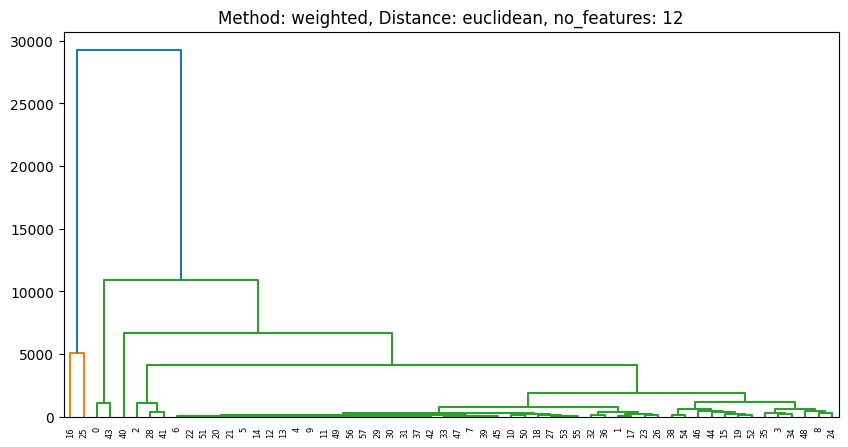

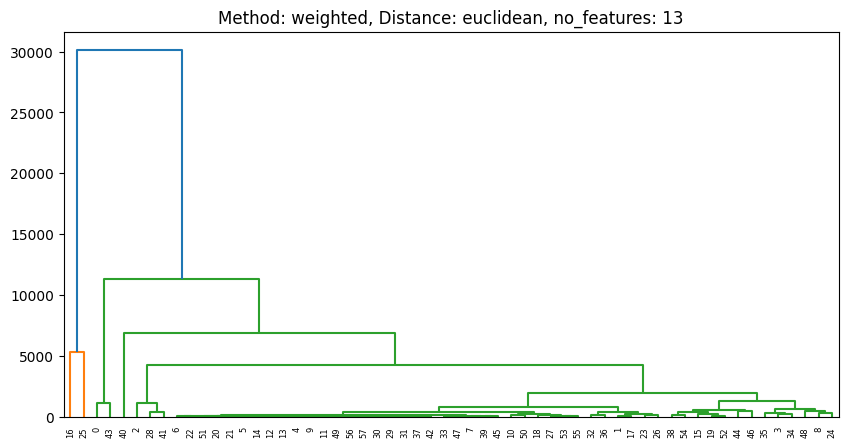

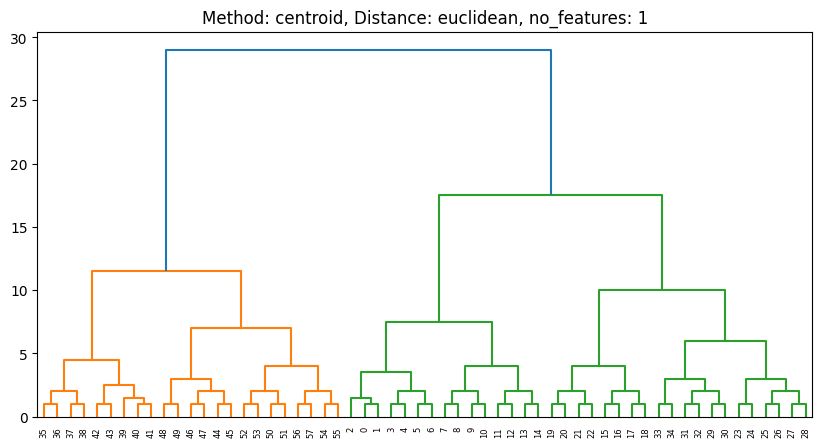

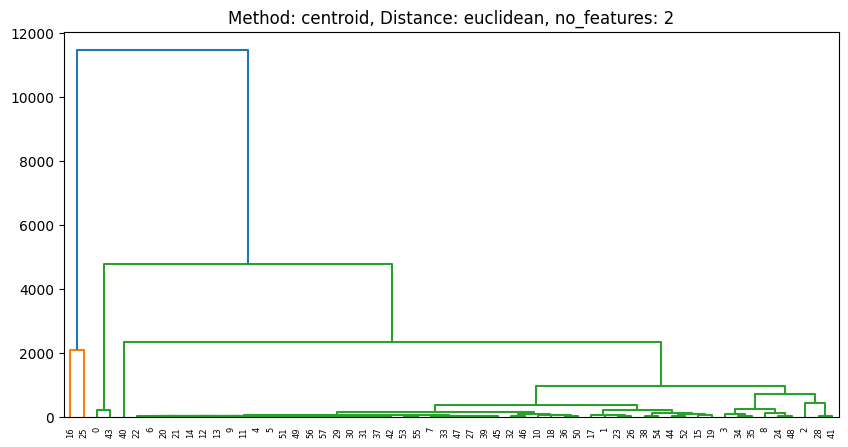

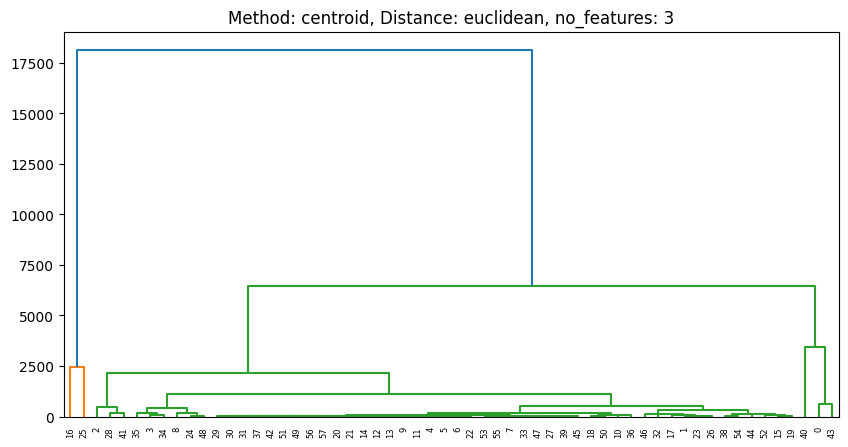

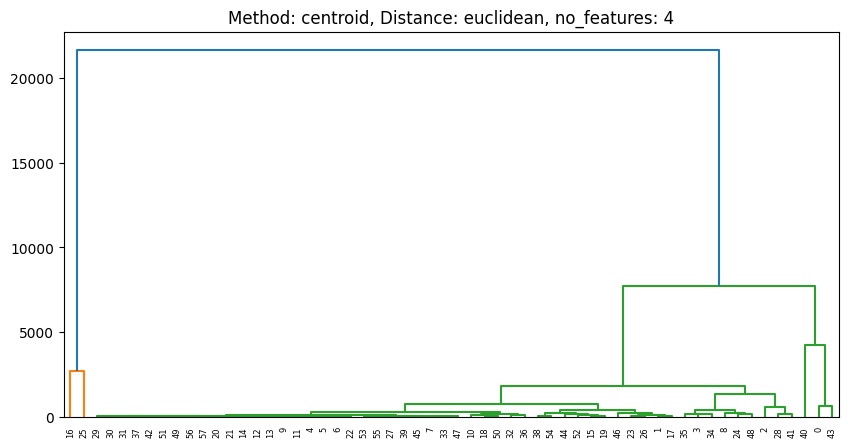

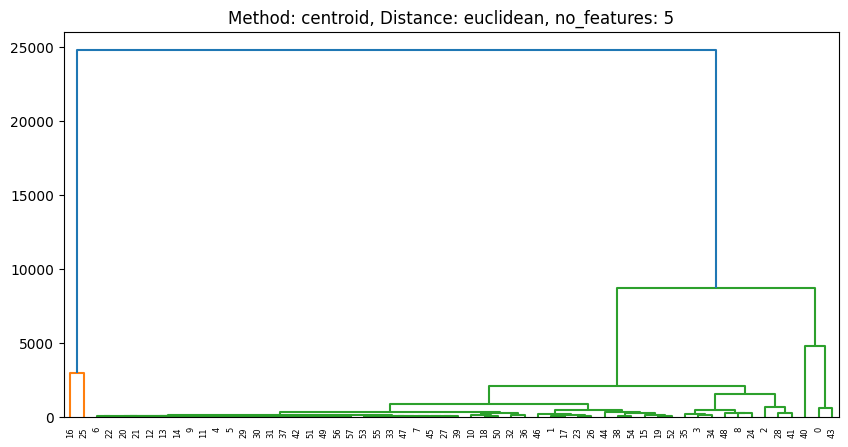

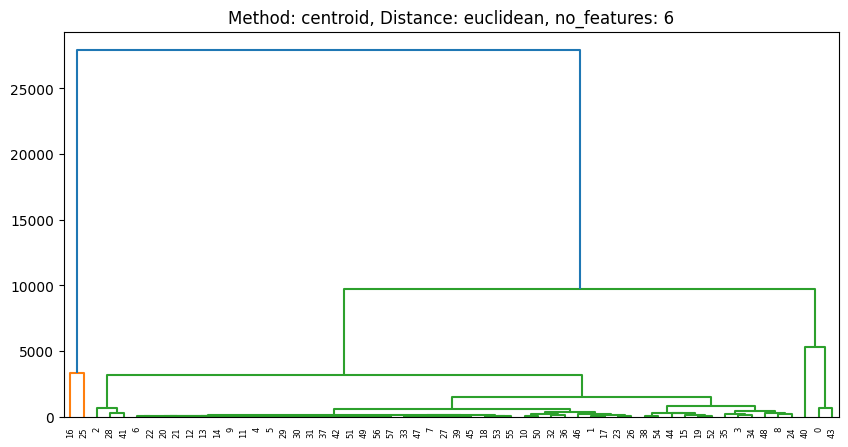

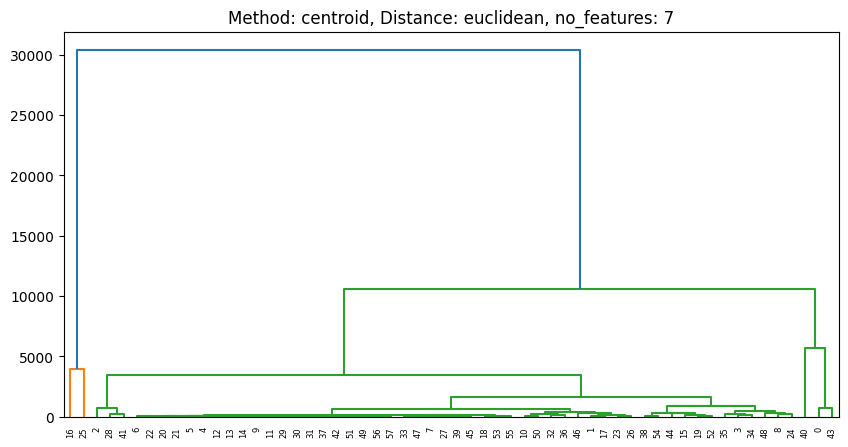

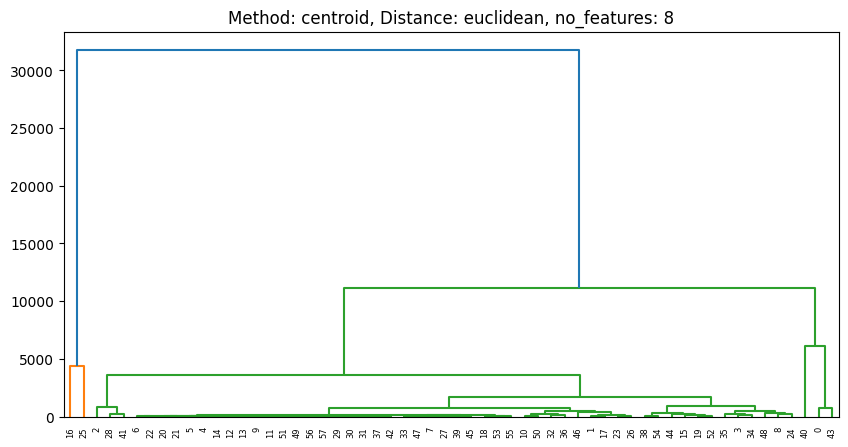

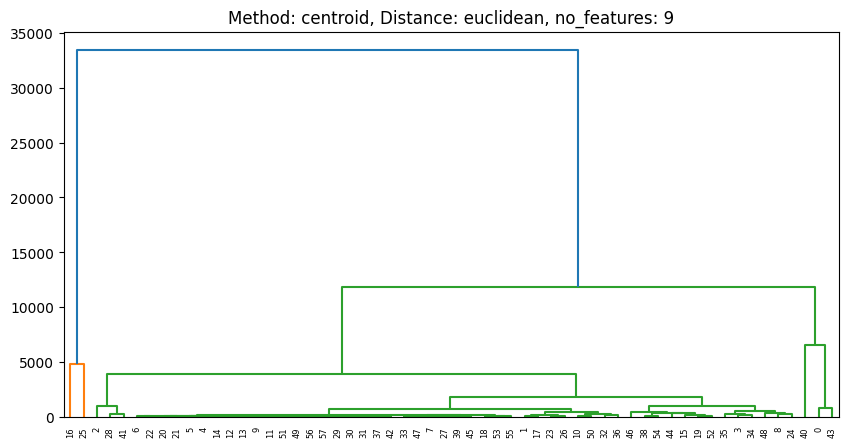

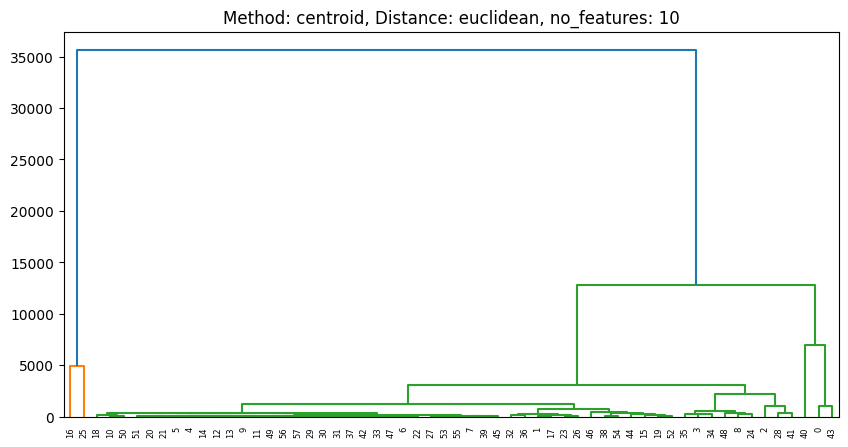

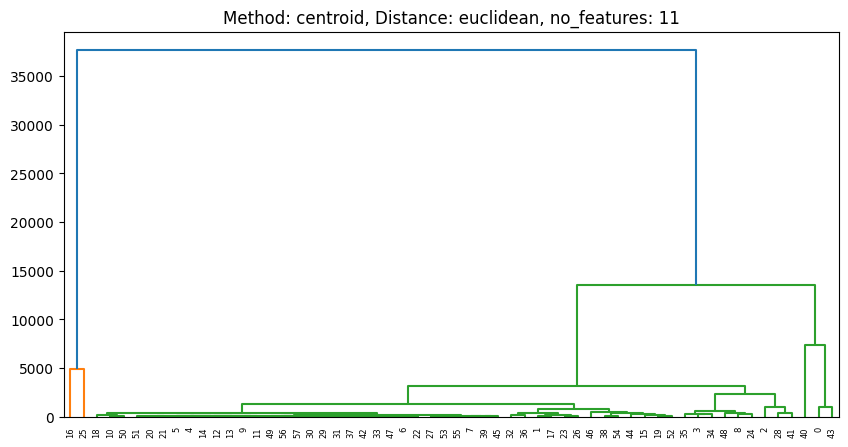

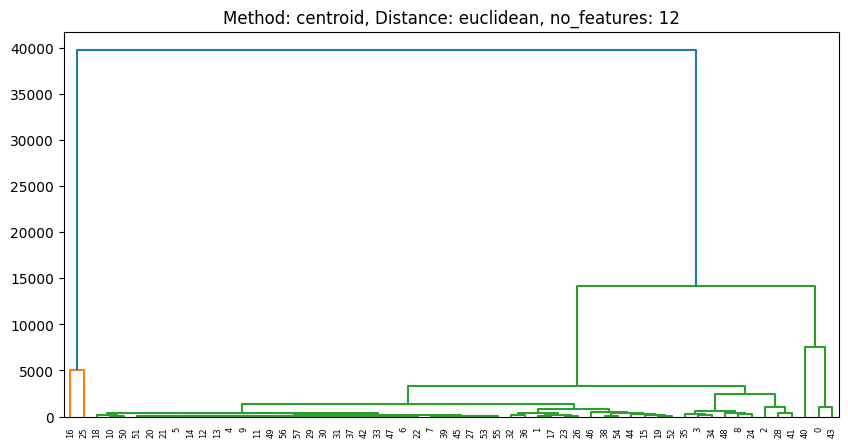

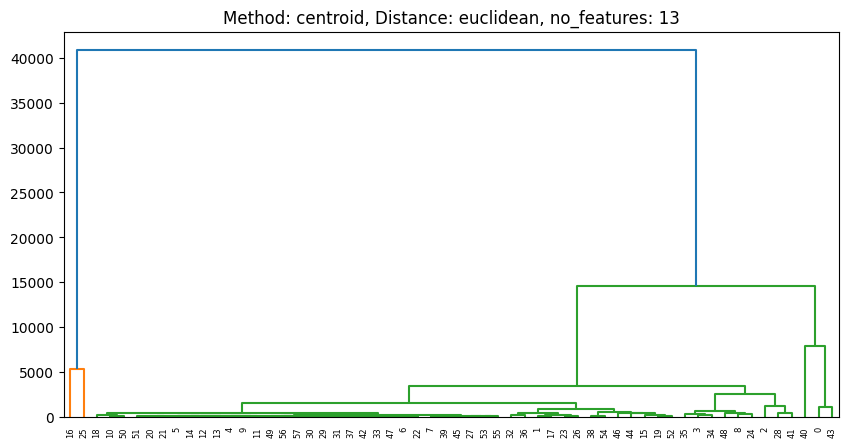

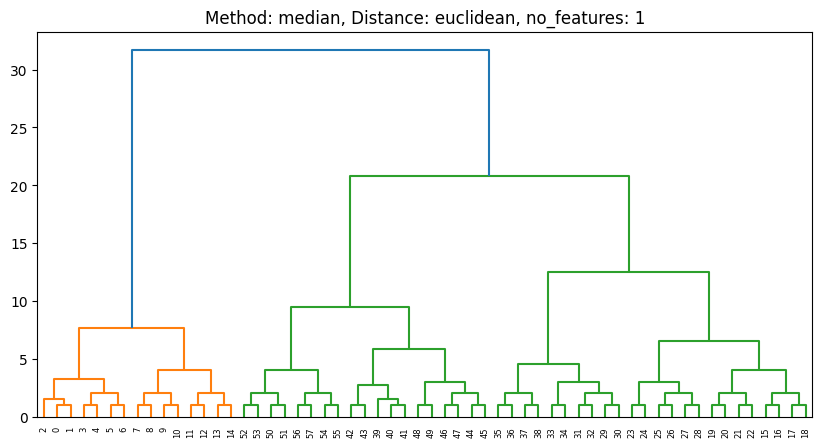

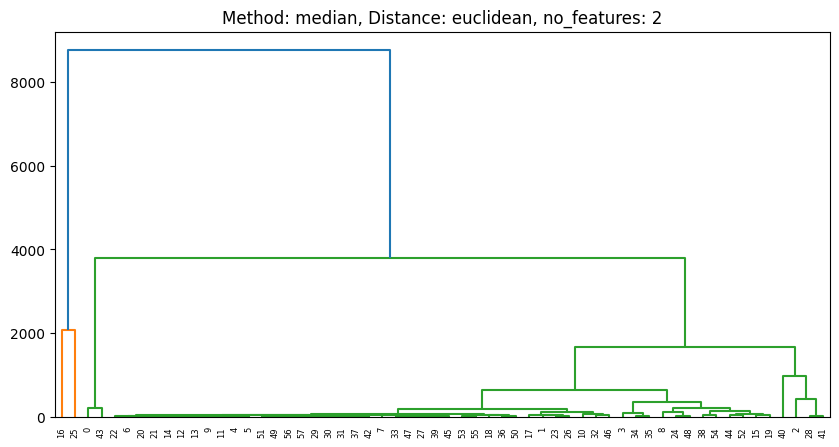

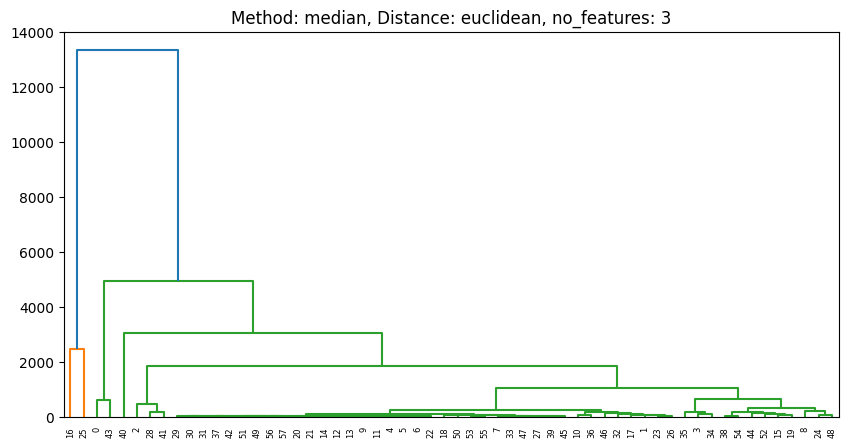

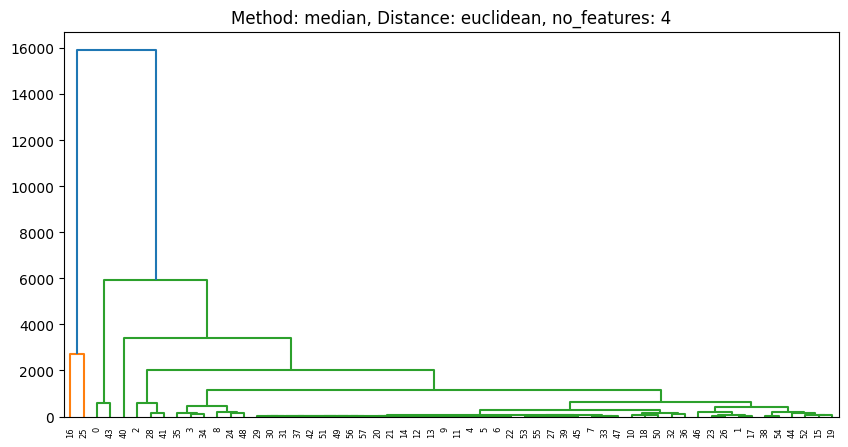

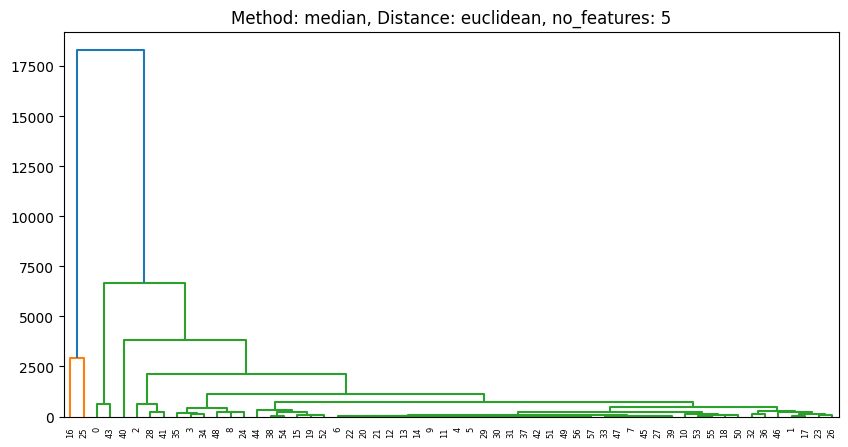

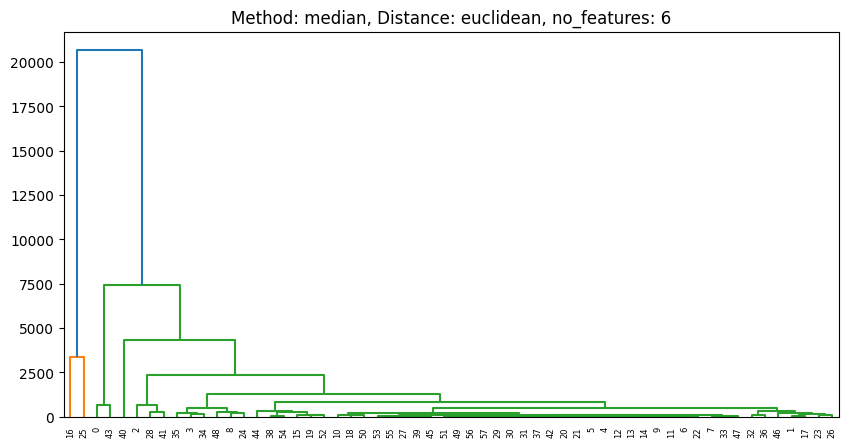

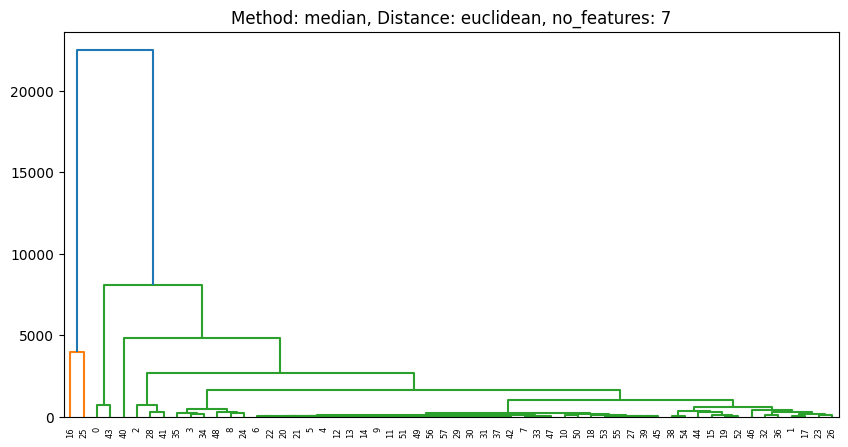

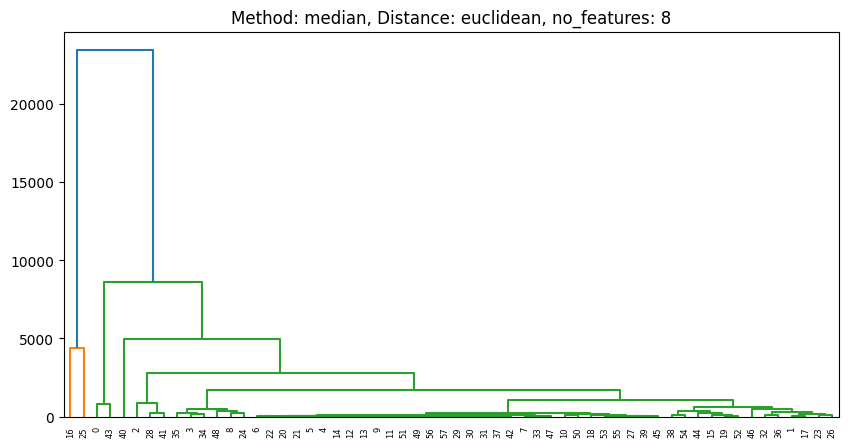

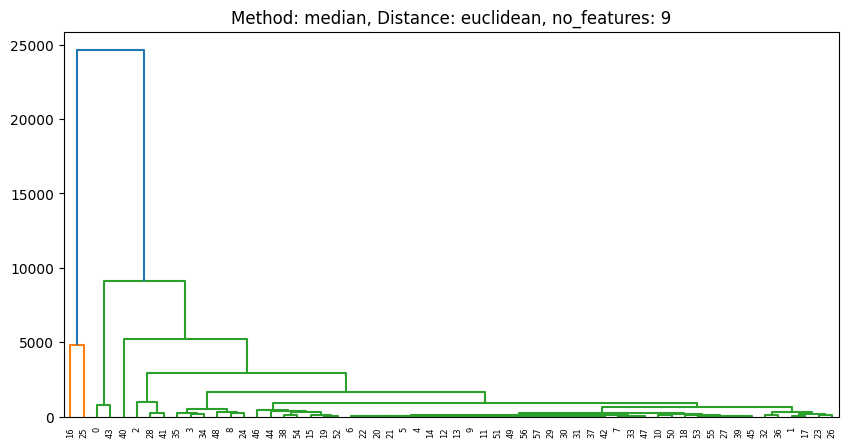

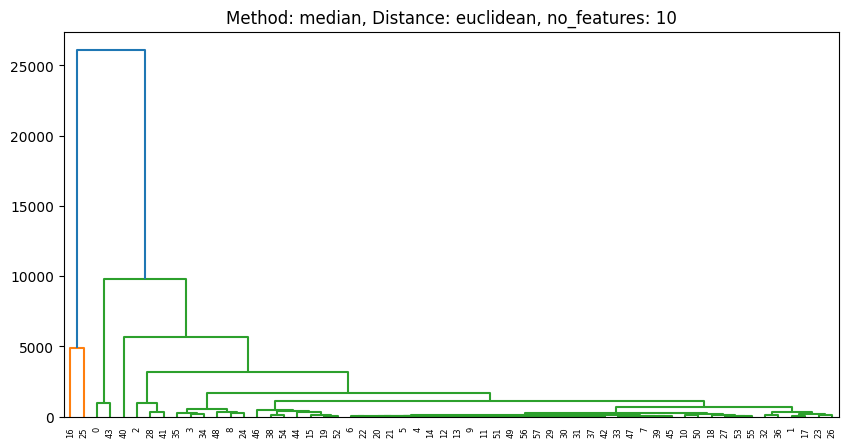

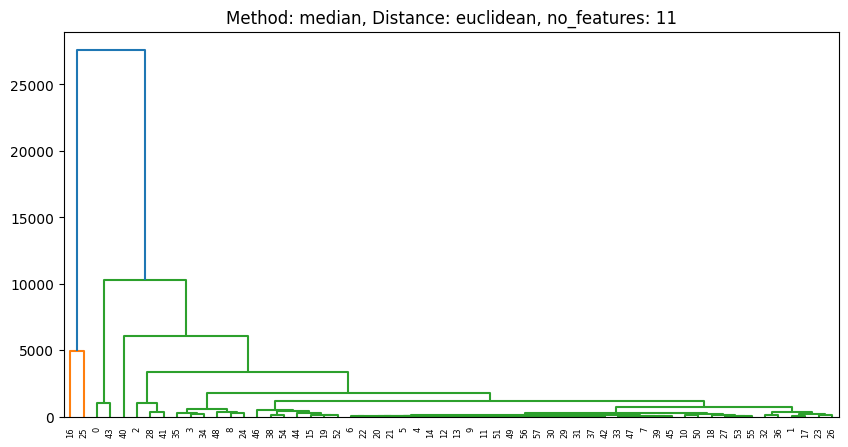

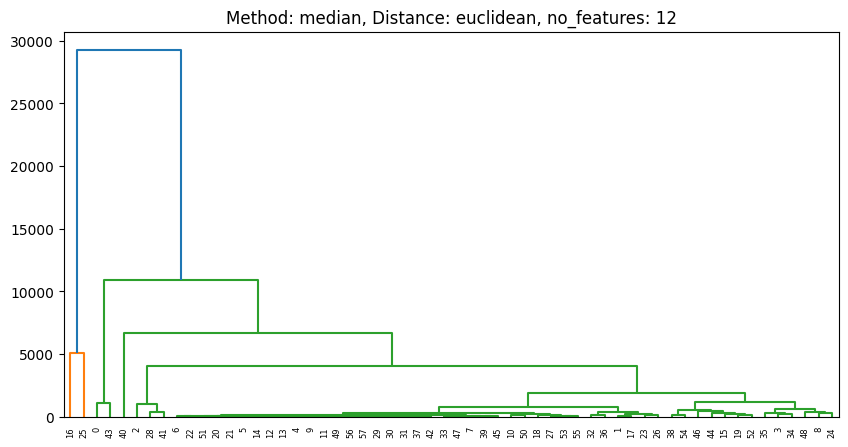

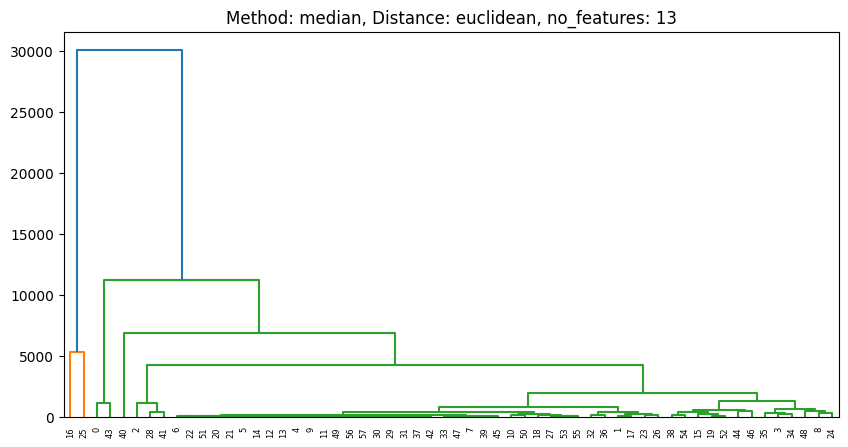

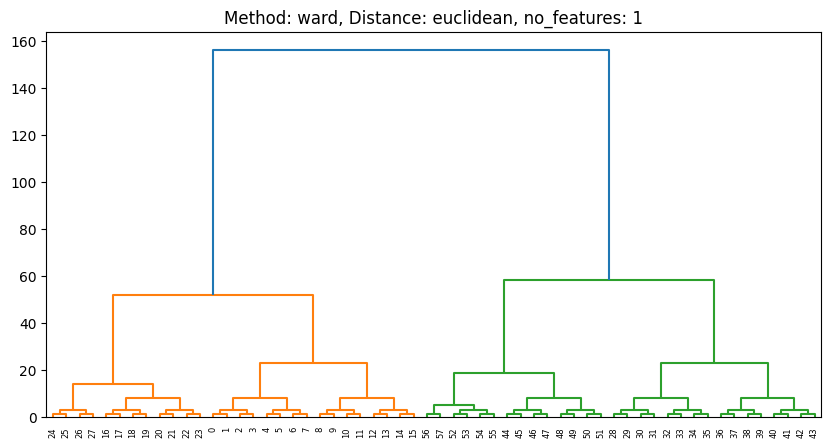

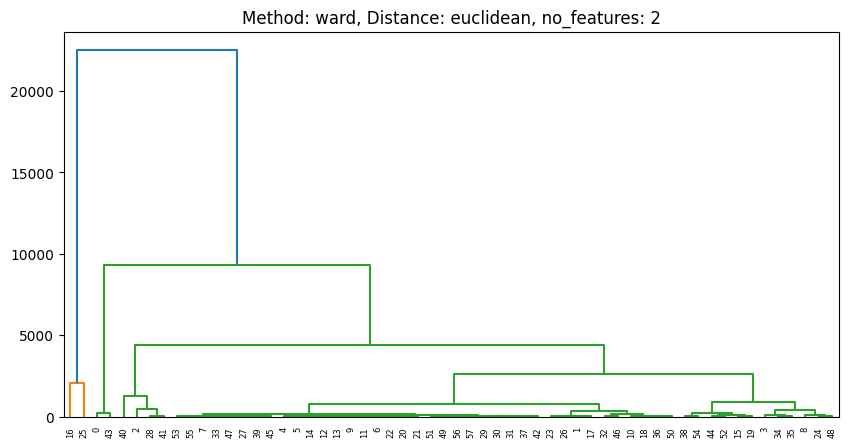

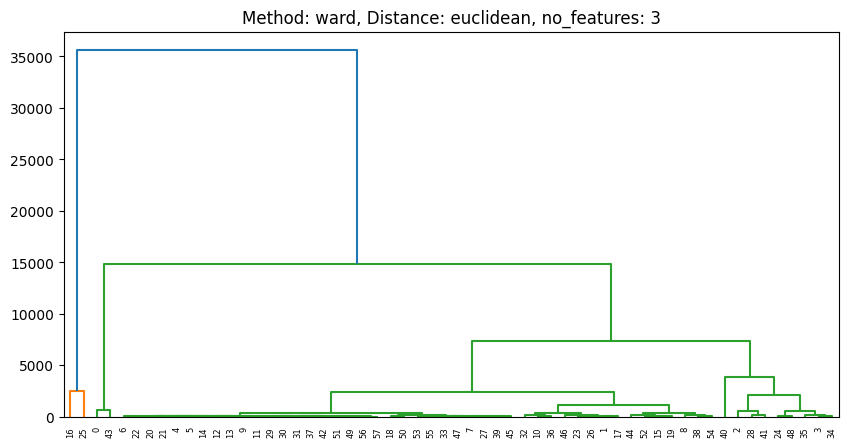

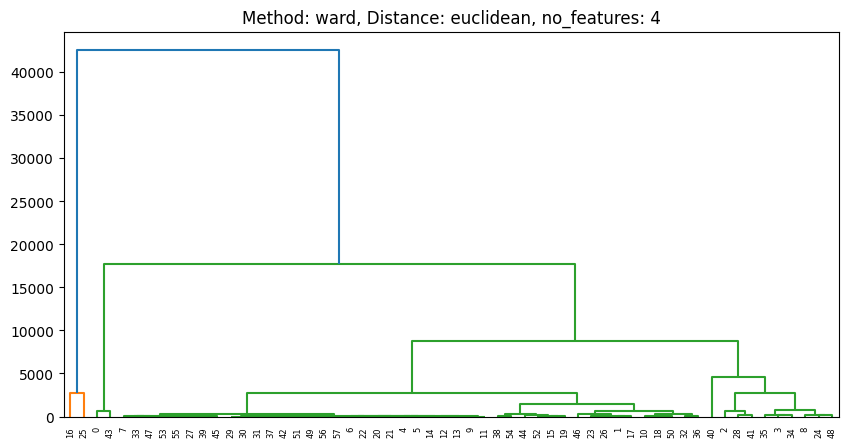

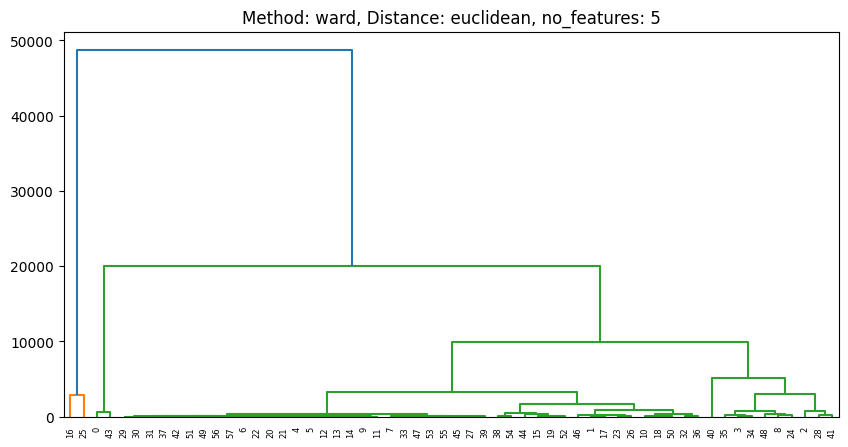

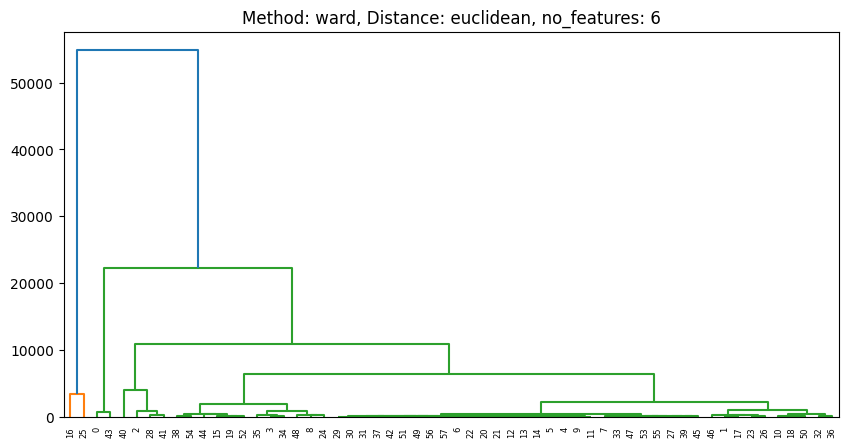

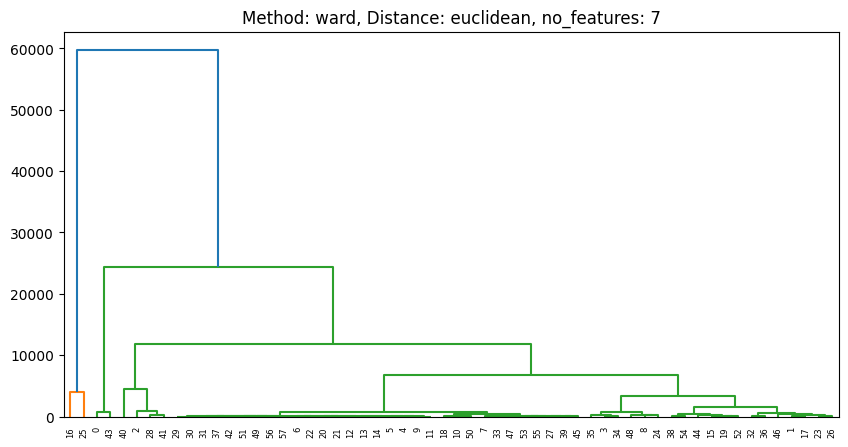

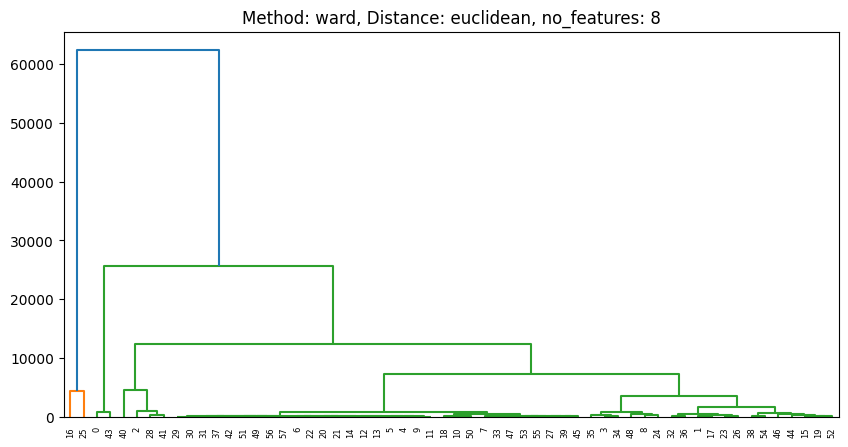

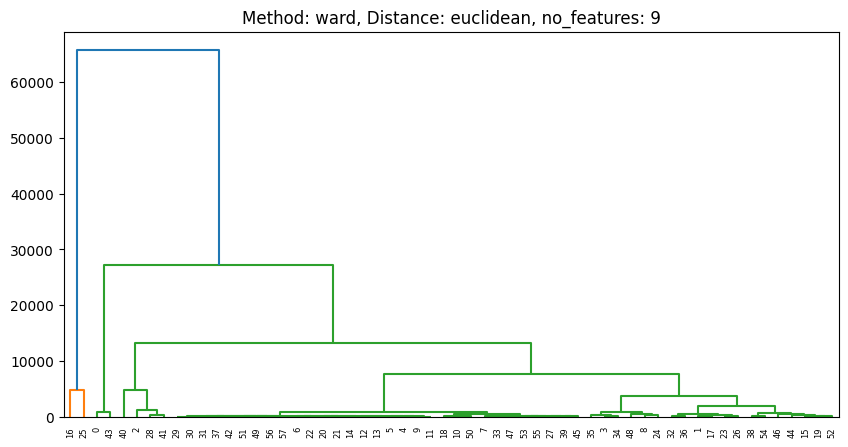

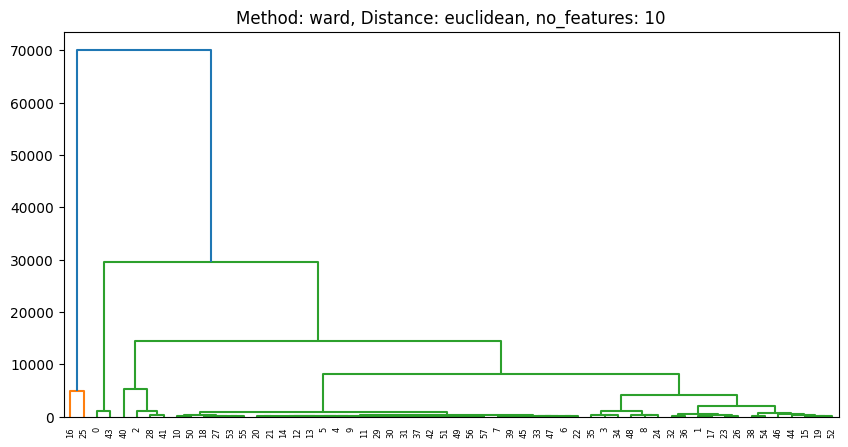

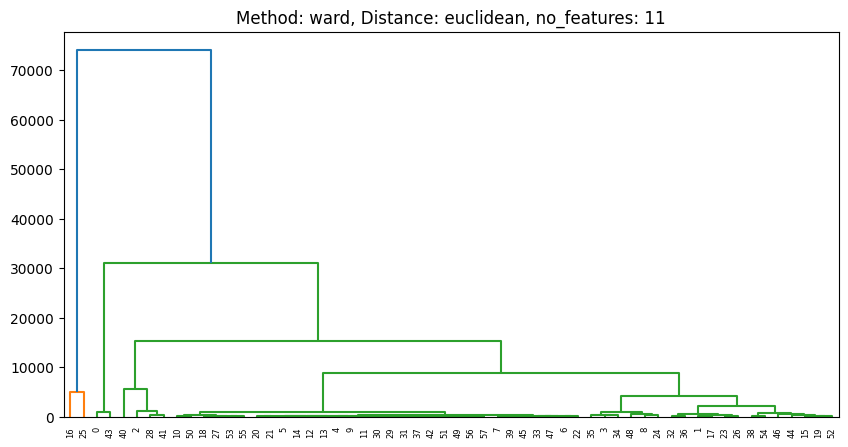

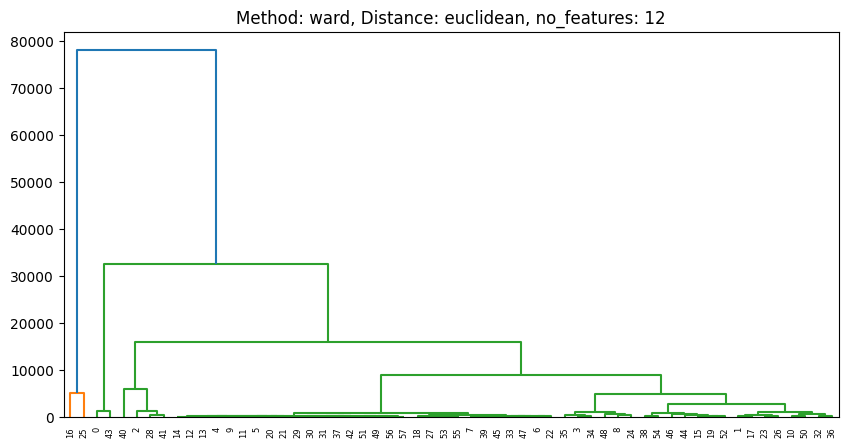

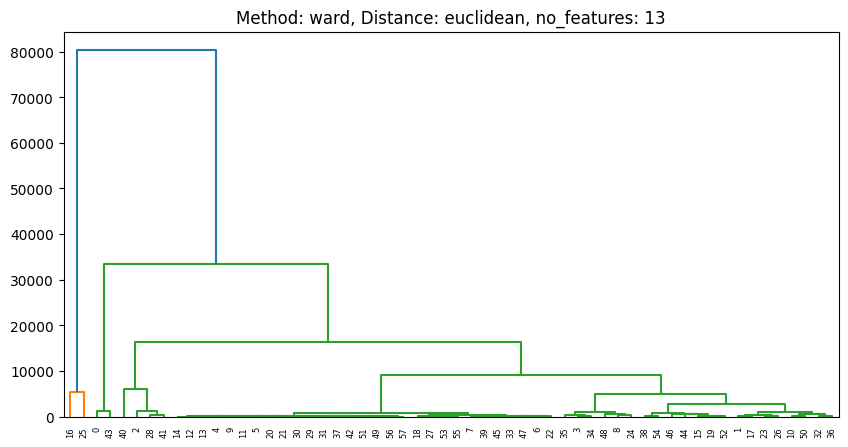

In [29]:
# Perform hierarchical clustering with different linkage methods and distance metrics
linkage_methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'median', 'ward']
# gene = HierarchicalClustering(gene_data)
for linkage_method in linkage_methods:
    for no_of_features in range(1, gene_data.shape[1]+1):
        gene = HierarchicalClustering(gene_data)
        Z = gene.linkages(linkage_method, 'euclidean', no_of_features)
        gene.dendogram(Z, linkage_method, 'euclidean', no_of_features)




The dendrograms generated by the code show the hierarchical clustering of the gene expression data using different linkage methods and distance metrics. 

From the dendrograms, we can observe that the choice of linkage method and distance metric can have a significant impact on the resulting clustering. 

For example, the single linkage method produces a dendrogram with very long branches, indicating that the clusters are not well separated. The complete linkage method produces a dendrogram with well-separated clusters. The average linkage method produces a dendrogram that is similar to the complete linkage method, but with slightly shorter branches. The centroid linkage method produces a dendrogram with well-separated clusters, similar to the complete linkage method. 
For the gene data, the complete linkage method seems to produce the best results in terms of well-separated clusters, with no_feature=1 being best (since its index).
